<a href="https://colab.research.google.com/github/CienciaDatosUDLA/Ciencia-de-Datos/blob/main/IA_adoption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PREDICTING AI-GOVERNMENT ADOPTION: A RANDOM FOREST APPROACH FOR REGRESION AND CLASIFICATION**


Author: Andrés Navas, PhD.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import shap

In [4]:
from google.colab import drive
drive.mount('/content/drive')

# Assuming your Excel file is in 'My Drive/your_folder'
data = pd.read_excel('/content/drive/My Drive/2023-Government-AI-Readiness-Index-Public-Indicator-Data.xlsx', sheet_name="Indicator scores")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 41 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   Country                                                                 193 non-null    object 
 1   IA Government Readiness                                                 193 non-null    float64
 2   AI strategy                                                             193 non-null    int64  
 3   Data protection and privacy laws                                        192 non-null    float64
 4   Cybersecurity                                                           193 non-null    float64
 5   Regulatory quality                                                      193 non-null    float64
 6   Ethical principles                                                      193 non-nu

In [ ]:
data.describe()

IA Government Readiness  AI strategy  Data protection and privacy laws  \
count               193.000000   193.000000                        192.000000   
mean                 44.944286    37.305699                         78.841527   
std                  16.751863    46.569782                         36.971876   
min                   9.197130     0.000000                          0.000000   
25%                  31.877226     0.000000                         57.706767   
50%                  41.371916     0.000000                        100.000000   
75%                  60.184682   100.000000                        100.000000   
max                  84.796171   100.000000                        100.000000   

       Cybersecurity  Regulatory quality  Ethical principles  Accountability  \
count     193.000000          193.000000          193.000000      193.000000   
mean       52.800910           48.392746           17.875648       48.784456   
std        34.879632           19.969345           36.502641       19.981584   
min         1.350000            2.200000            0.000000        9.600000   
25%        18.230000           35.400000            0.000000       31.400000   
50%        53.230000           47.000000            0.000000       50.000000   
75%        88.820000           61.400000            0.000000       66.800000   
max       100.000000           94.200000          100.000000       85.400000   

       Online services  Foundational IT infrastructure  \
count       193.000000                      193.000000   
mean         55.773368                       57.751295   
std          24.214006                       23.766135   
min           0.000000                        0.300000   
25%          36.520000                       38.200000   
50%          54.090000                       58.100000   
75%          77.530000                       79.200000   
max         100.000000                       99.000000   

       Government Promotion of Investment in Emerging Technologies  ...  \
count                                         184.000000            ...   
mean                                           39.555162            ...   
std                                            20.678568            ...   
min                                             0.050000            ...   
25%                                            23.668750            ...   
50%                                            37.034000            ...   
75%                                            49.055000            ...   
max                                           100.000000            ...   

       Broadband Quality  5G Infrastructure  \
count         184.000000         193.000000   
mean           42.598167          50.259067   
std            10.490422          50.129366   
min            18.400000           0.000000   
25%            34.875000           0.000000   
50%            39.720000         100.000000   
75%            51.800000         100.000000   
max            85.300000         100.000000   

       Adoption of Emerging Technologies   Open Data  Data governance  \
count                         184.000000  187.000000       193.000000   
mean                           47.281960   34.666674        25.388601   
std                            21.404982   27.363651        32.322903   
min                             0.000000    0.000000         0.000000   
25%                            32.455000    0.750000         0.000000   
50%                            44.222308   35.750000         0.000000   
75%                            60.772500   51.500000        50.000000   
max                           100.000000   90.000000       100.000000   

       Mobile-cellular telephone subscriptions  \
count                               193.000000   
mean                                 79.841884   
std                                  21.733068   
min                                  15.153846   
25%                      

In [6]:
#data.describe().map('{:.2f}'.format)

data.describe()
formatted_description = data.describe().map('{:.2f}'.format)

# Export to Excel
formatted_description.to_excel('/content/drive/My Drive/descriptive_stats.xlsx', sheet_name='Descriptive_Stats')


In [7]:
# Missing values
# Exclude columns with non-numeric data types before applying fillna
numeric_columns = data.select_dtypes(include=['number']).columns
data[numeric_columns] = data[numeric_columns].apply(lambda x: x.fillna(x.mean()), axis=0)

Country                                                                   0
IA Government Readiness                                                   0
AI strategy                                                               0
Data protection and privacy laws                                          0
Cybersecurity                                                             0
Regulatory quality                                                        0
Ethical principles                                                        0
Accountability                                                            0
Online services                                                           0
Foundational IT infrastructure                                            0
Government Promotion of Investment in Emerging Technologies               0
Government Effectiveness                                                  0
Government responsiveness to change                                       0
Procurement 

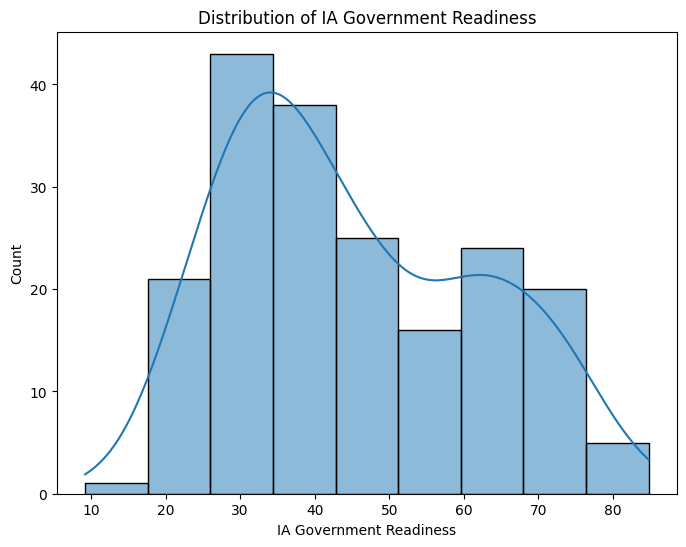

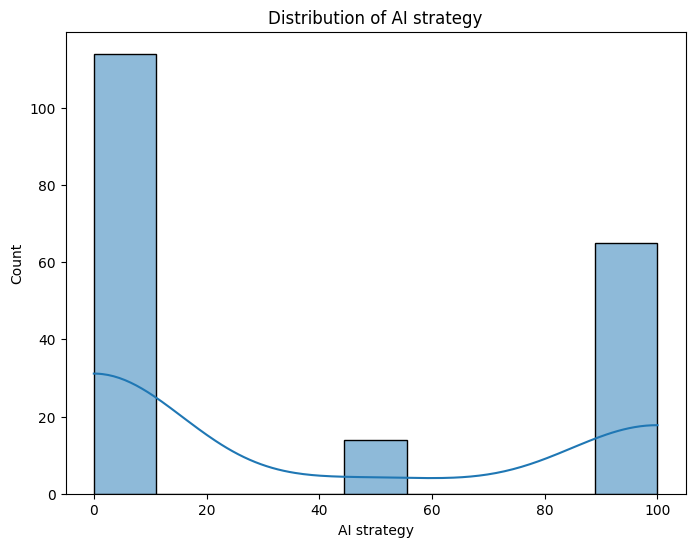

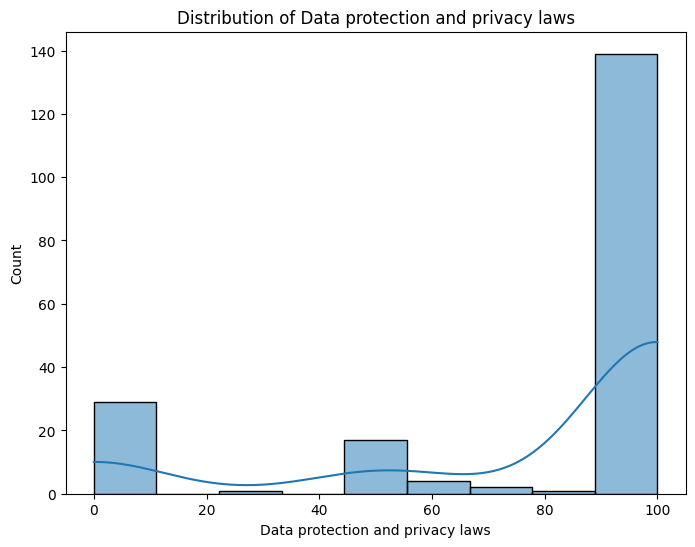

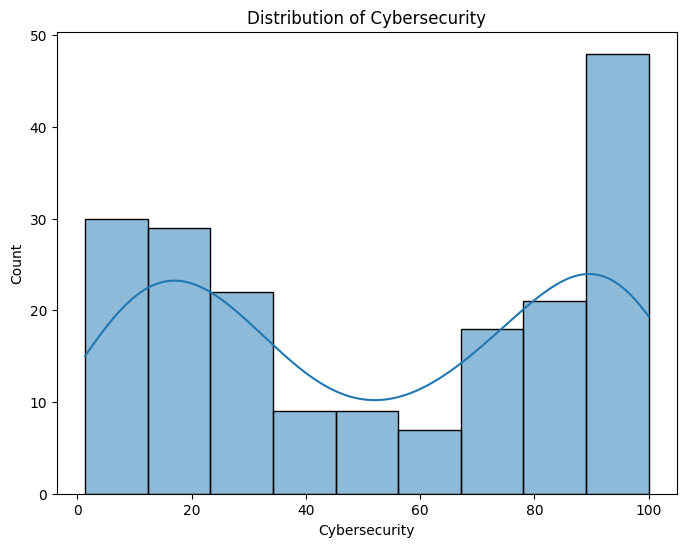

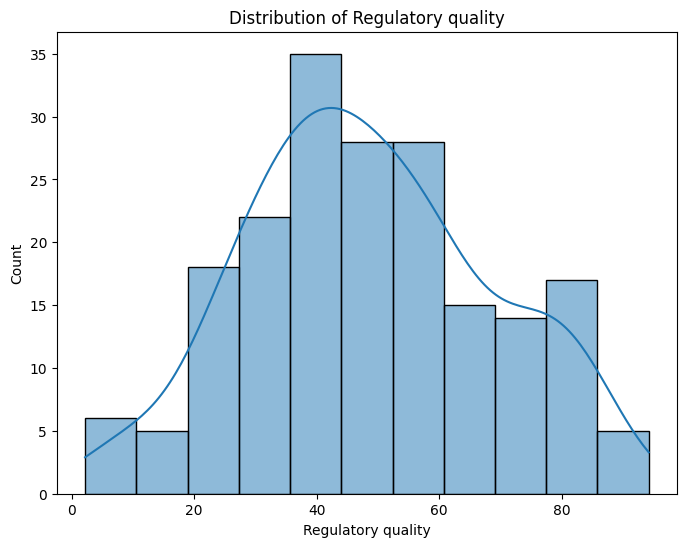

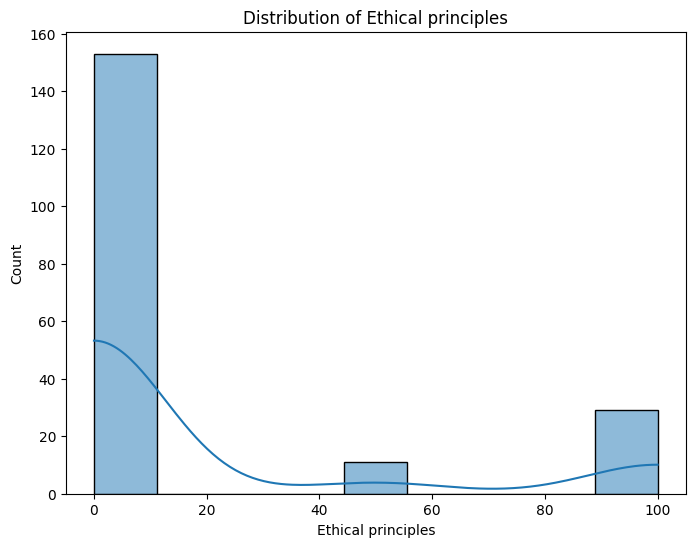

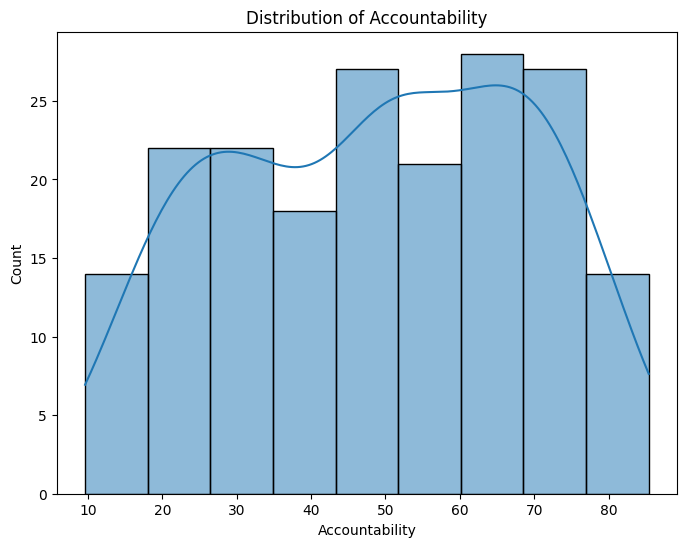

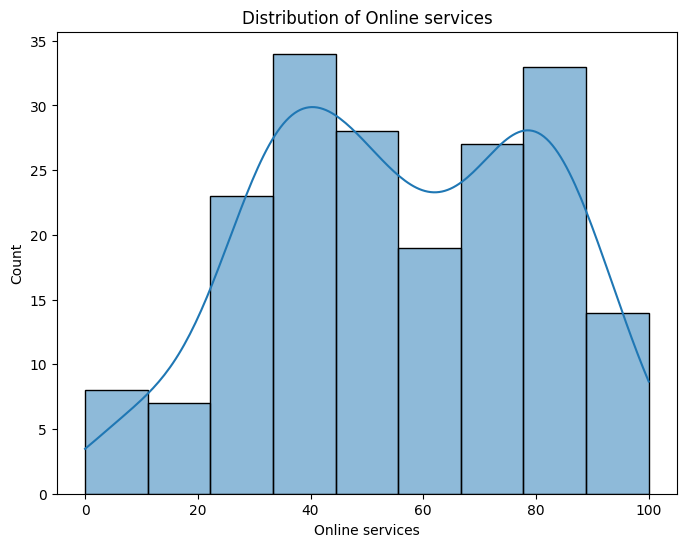

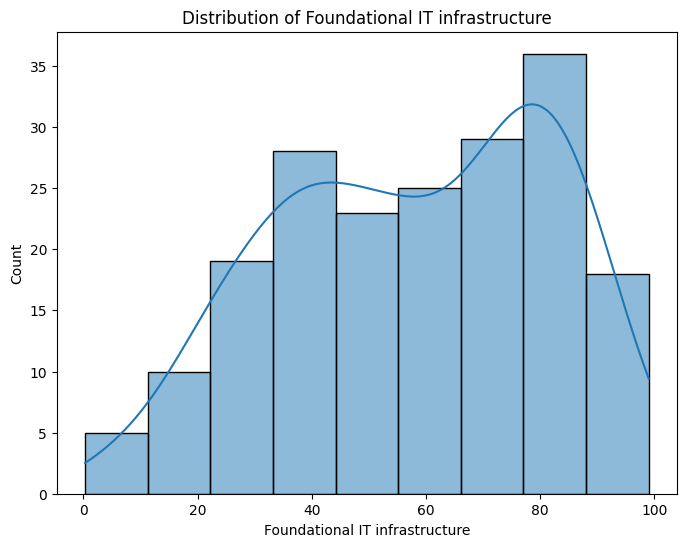

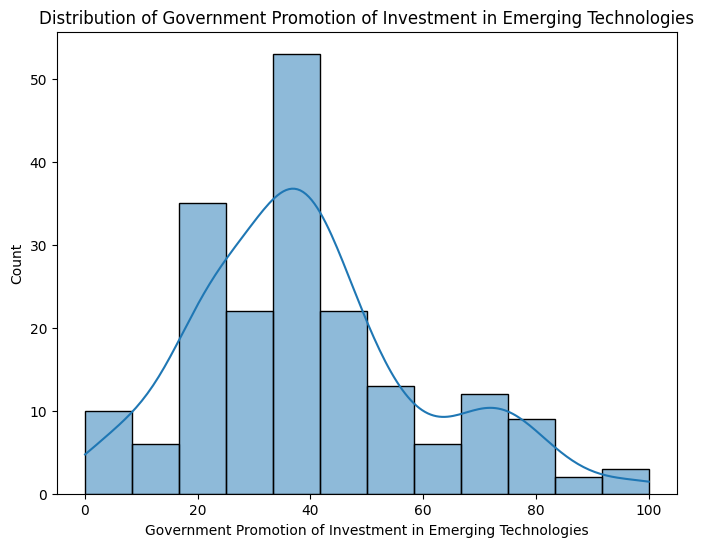

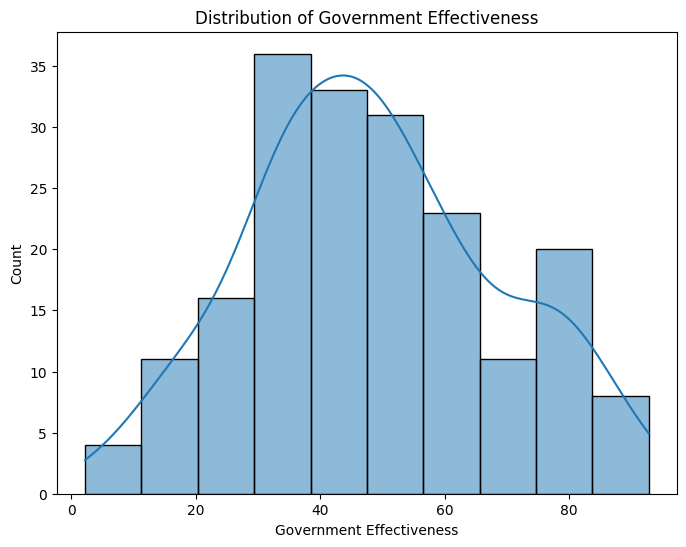

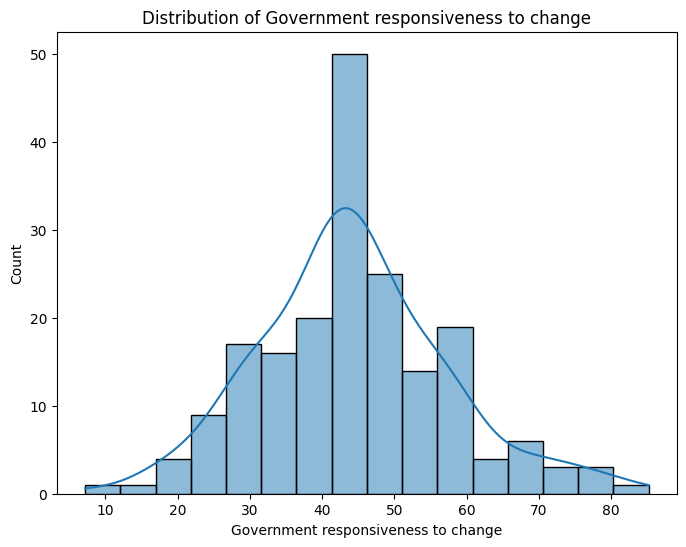

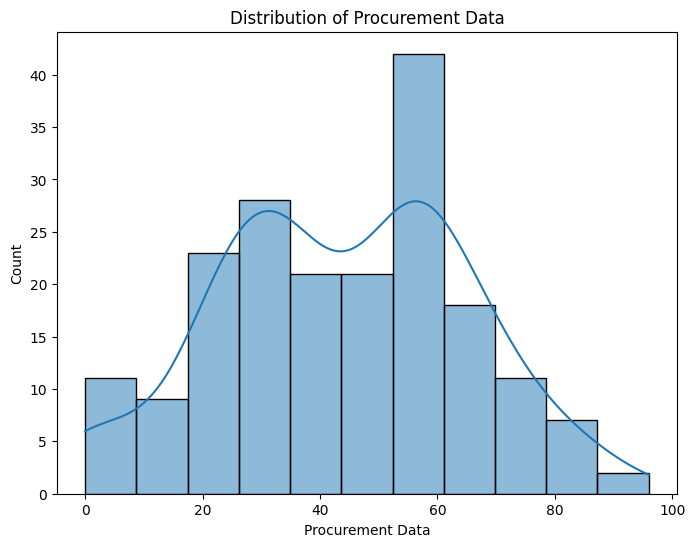

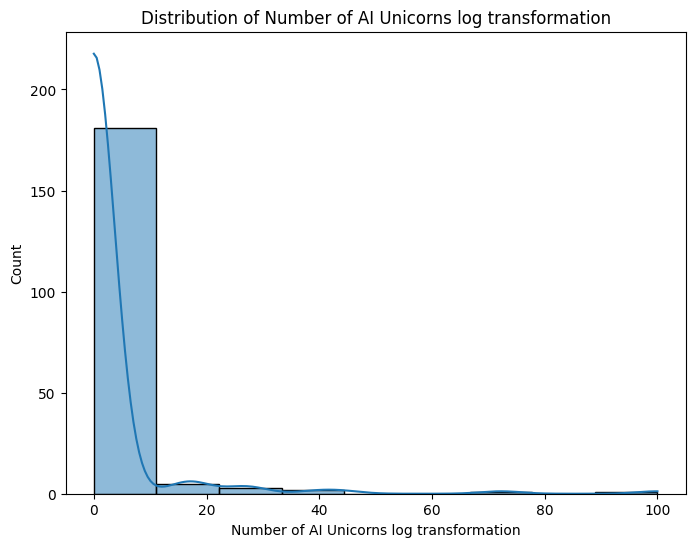

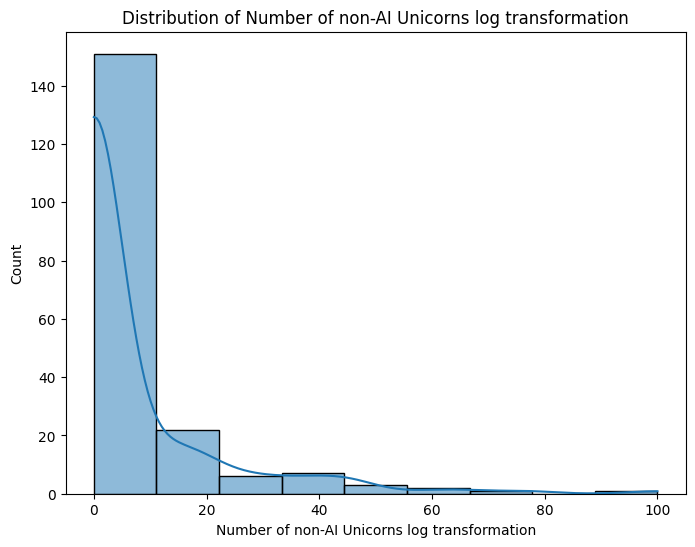

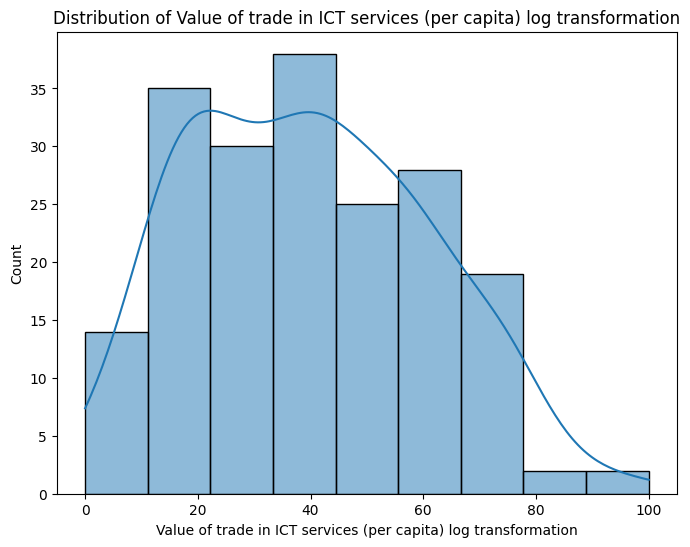

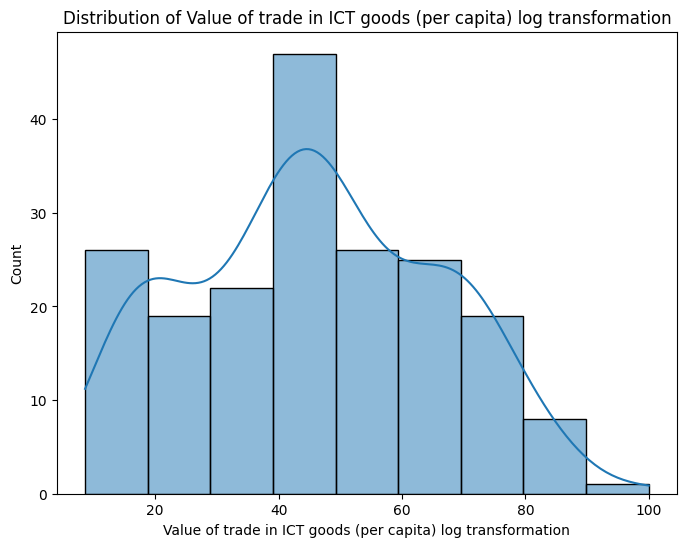

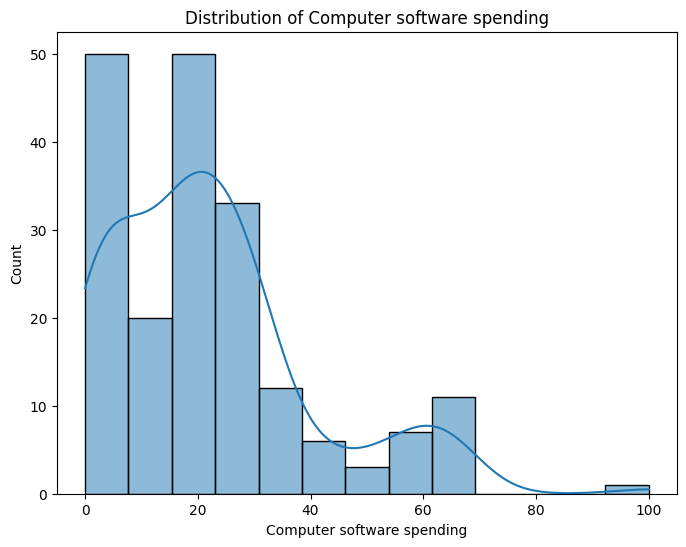

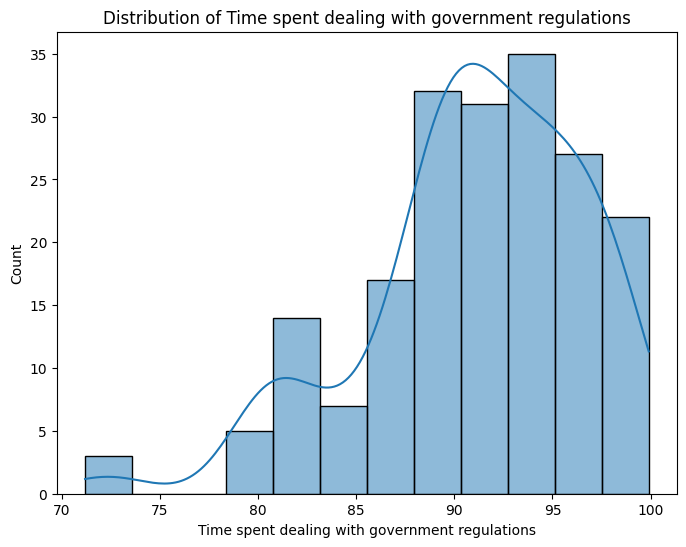

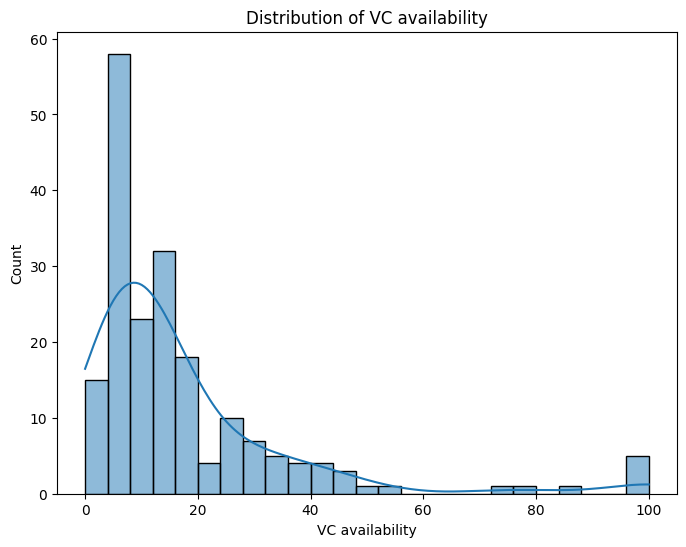

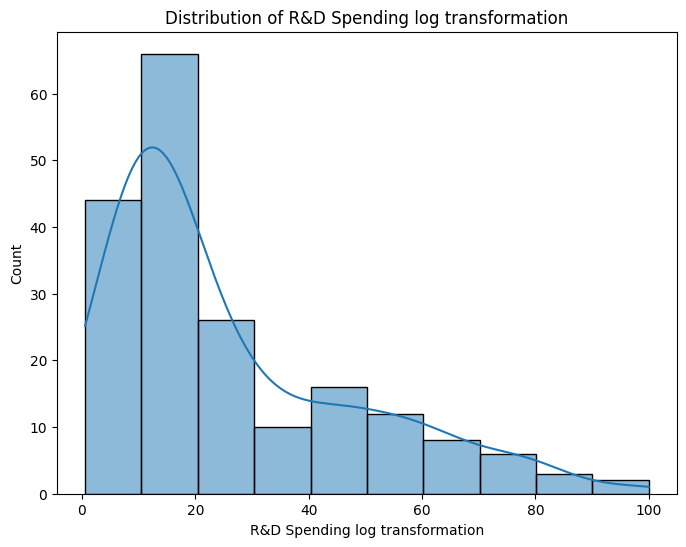

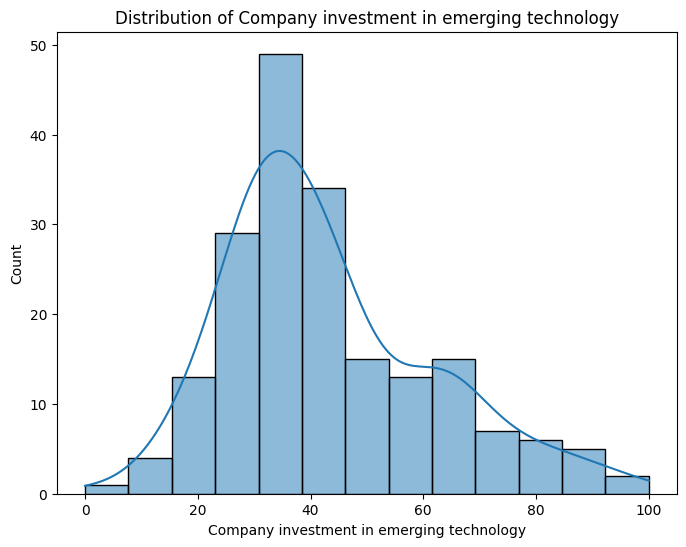

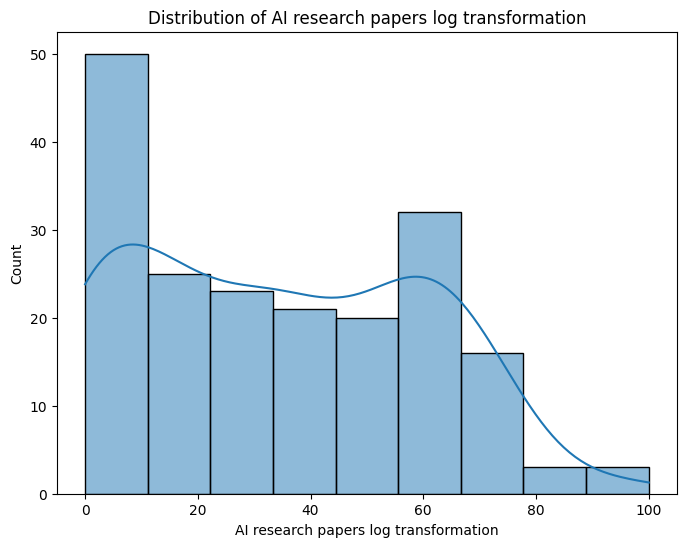

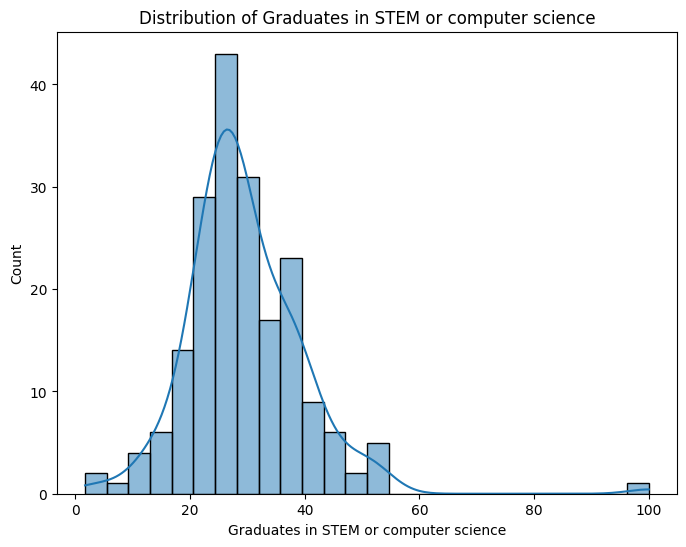

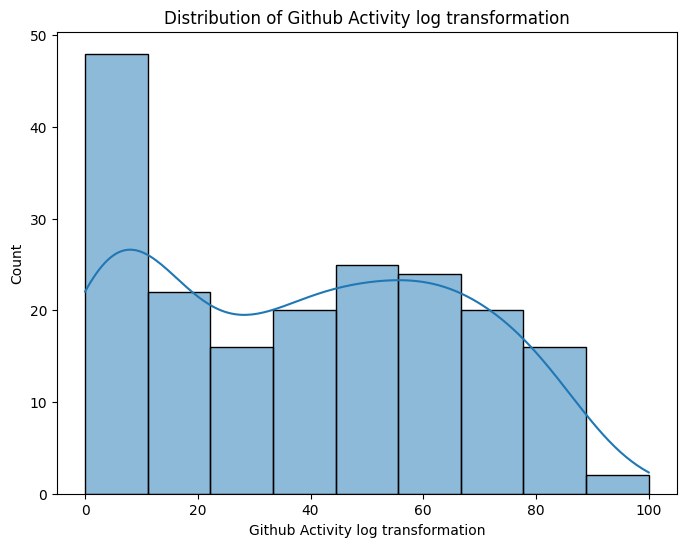

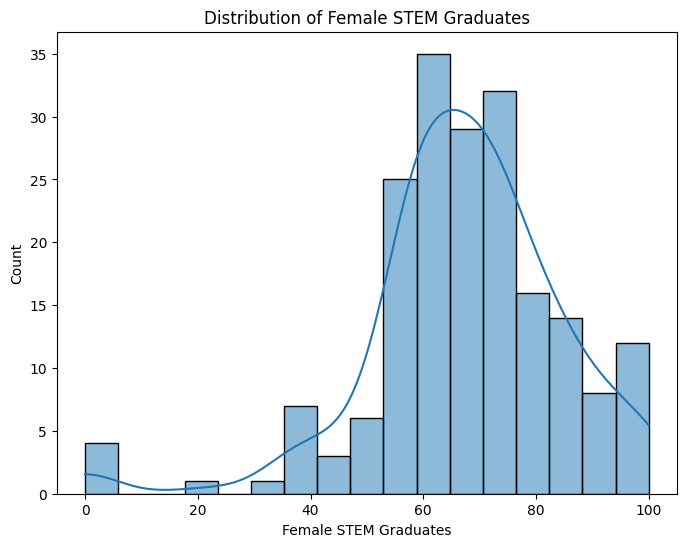

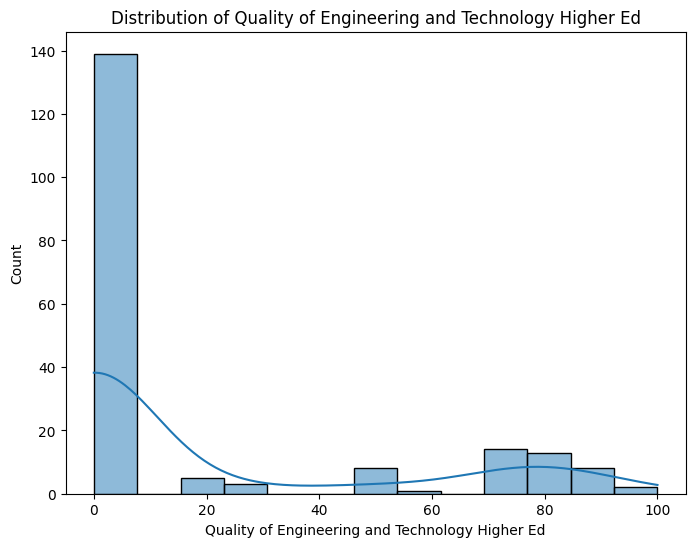

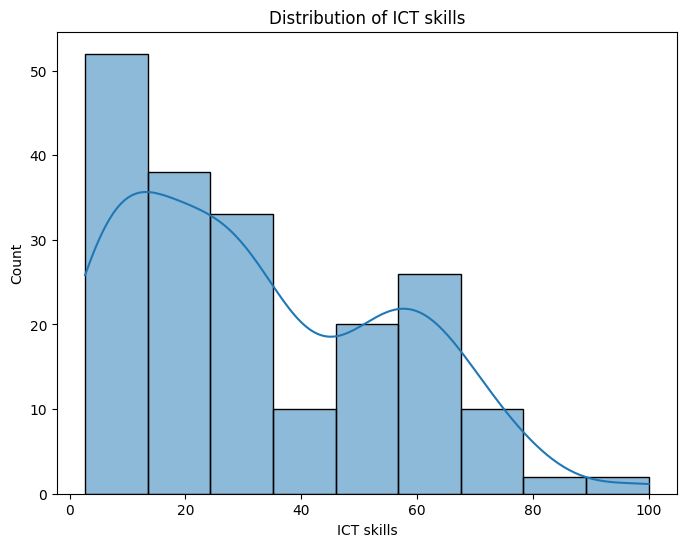

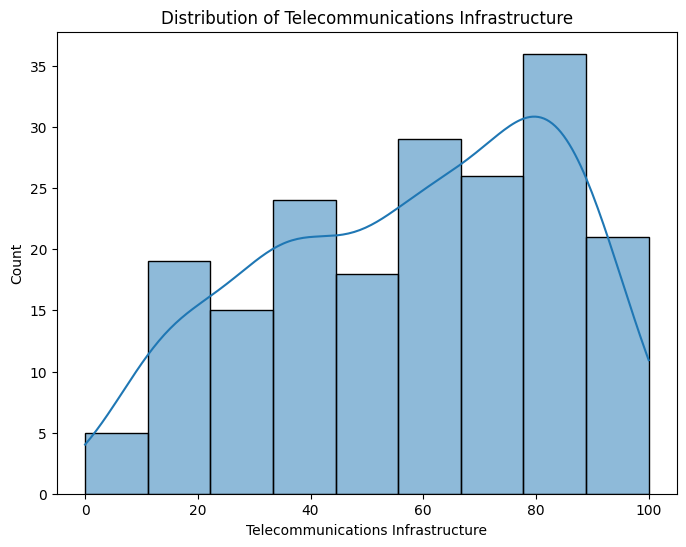

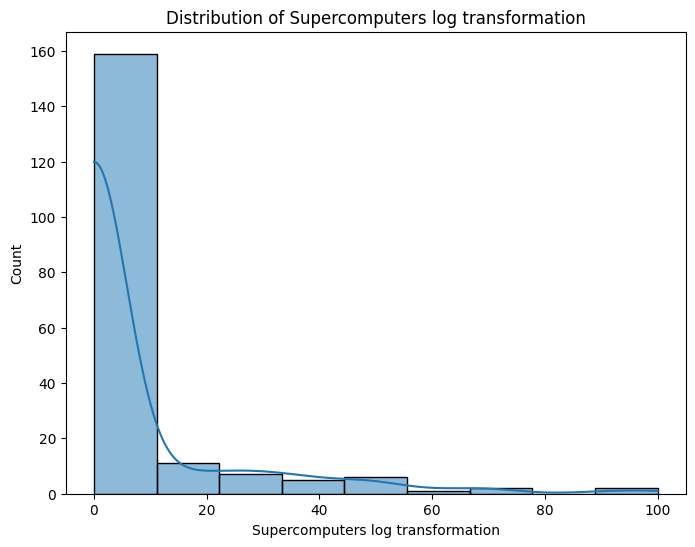

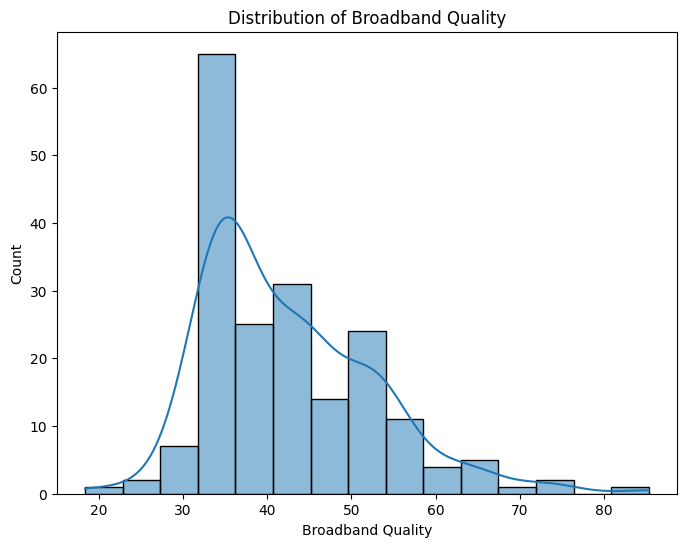

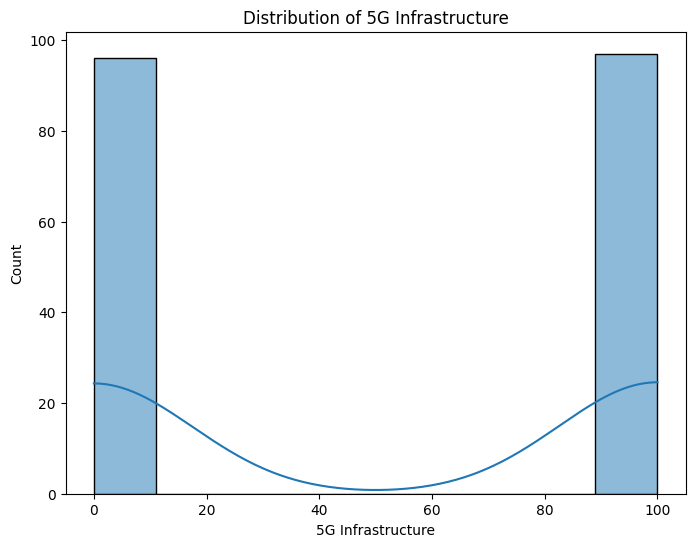

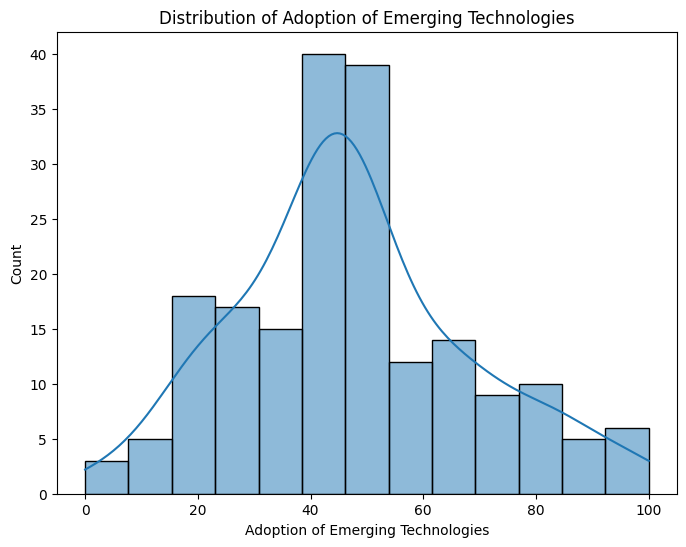

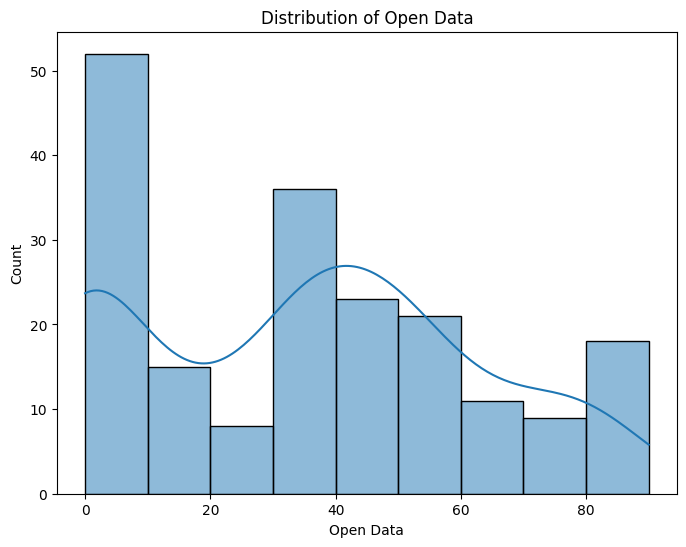

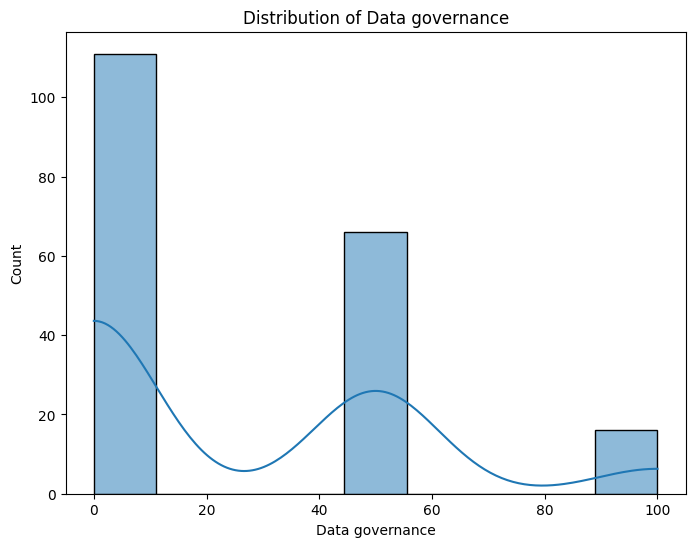

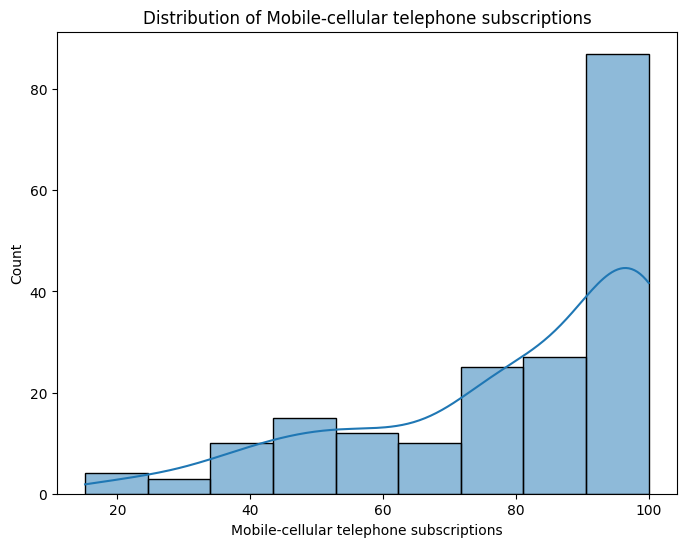

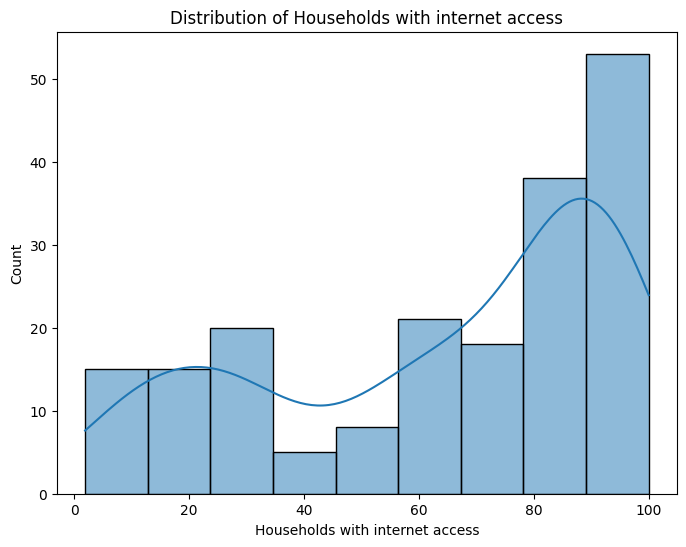

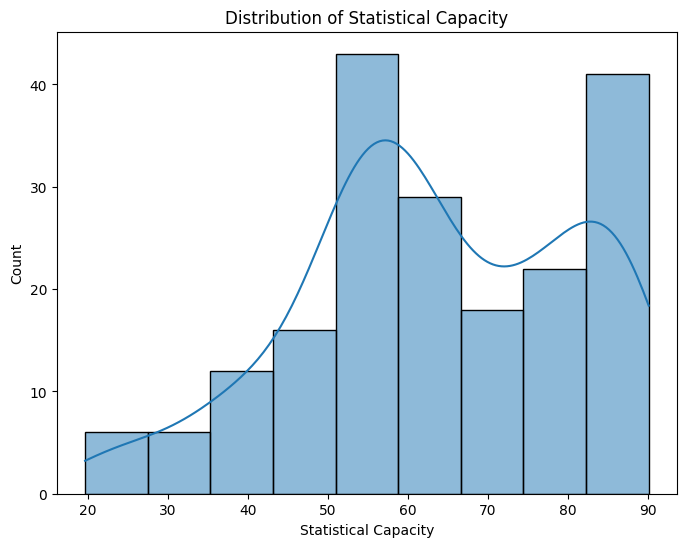

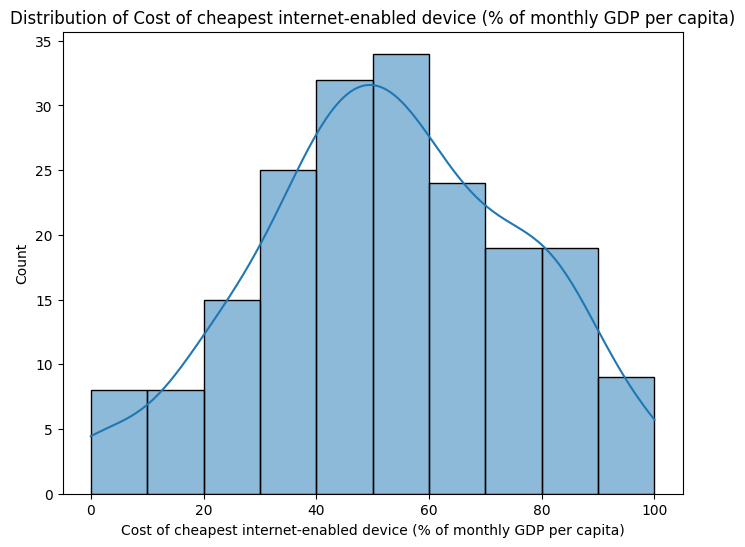

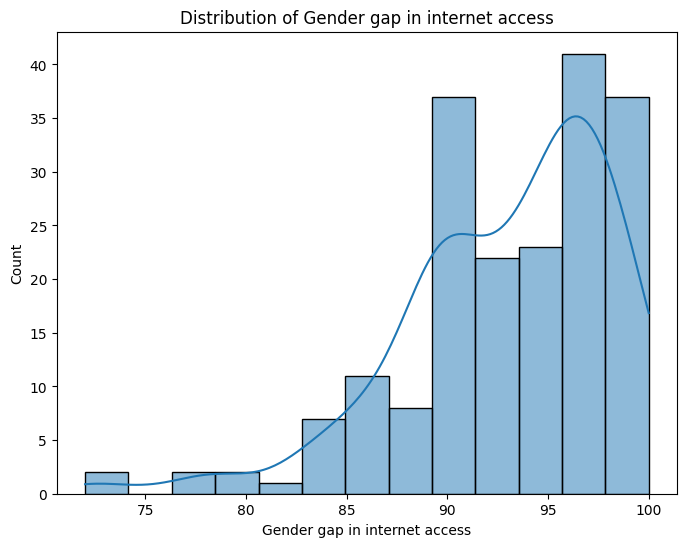

In [8]:
# Let's explore the data further

# Check for missing values
print(data.isnull().sum())

# Look at the distribution of numerical features
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = data.select_dtypes(include=np.number).columns
for feature in numerical_features:
  plt.figure(figsize=(8, 6))
  sns.histplot(data[feature], kde=True)
  plt.title(f"Distribution of {feature}")
  plt.show()



In [9]:
# Check for missing values again after filling them
print("\nMissing values after filling:")
print(data.isnull().sum())



Missing values after filling:
Country                                                                   0
IA Government Readiness                                                   0
AI strategy                                                               0
Data protection and privacy laws                                          0
Cybersecurity                                                             0
Regulatory quality                                                        0
Ethical principles                                                        0
Accountability                                                            0
Online services                                                           0
Foundational IT infrastructure                                            0
Government Promotion of Investment in Emerging Technologies               0
Government Effectiveness                                                  0
Government responsiveness to change                      

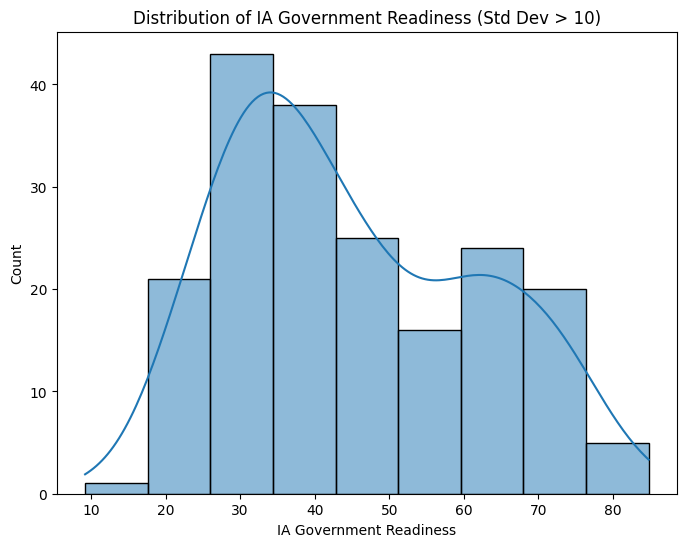

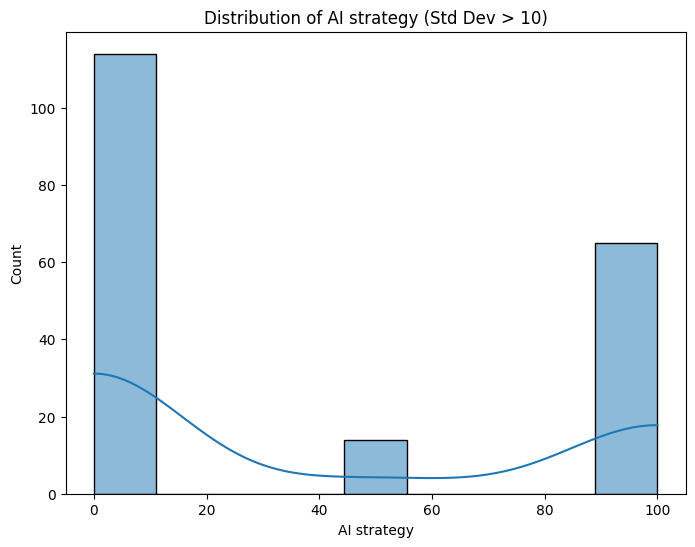

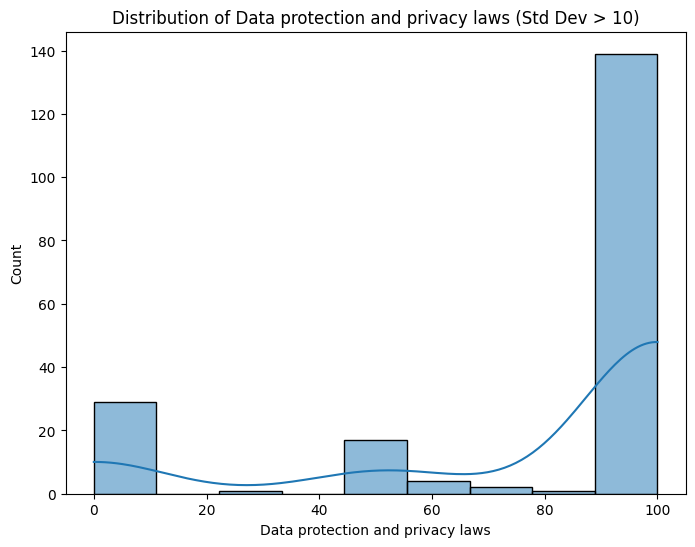

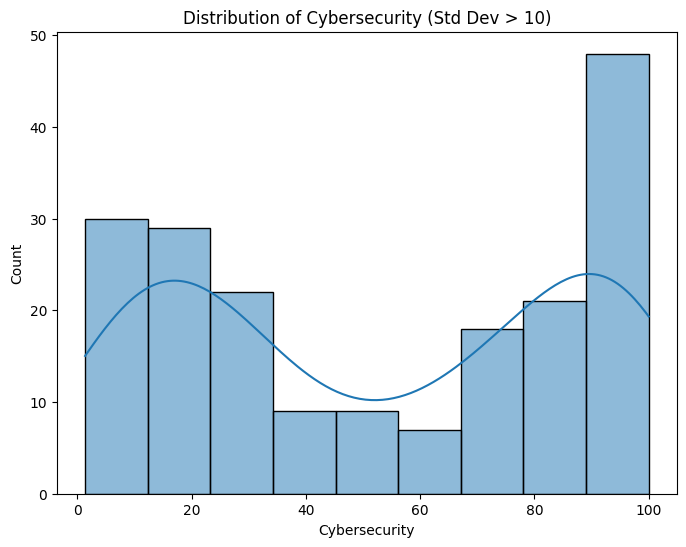

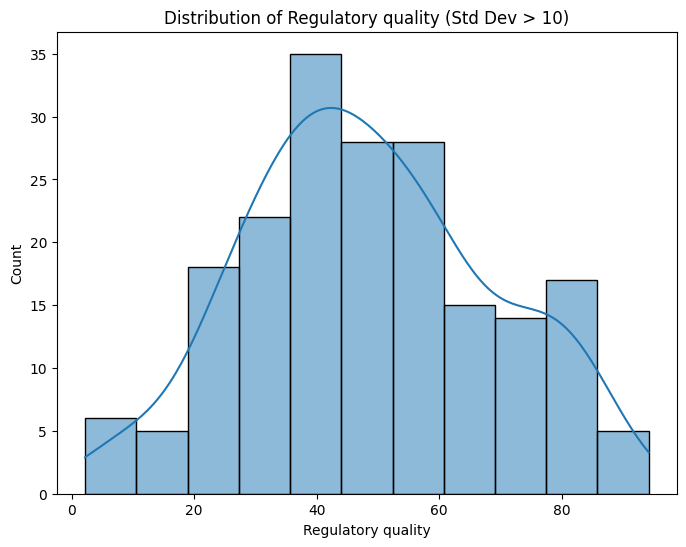

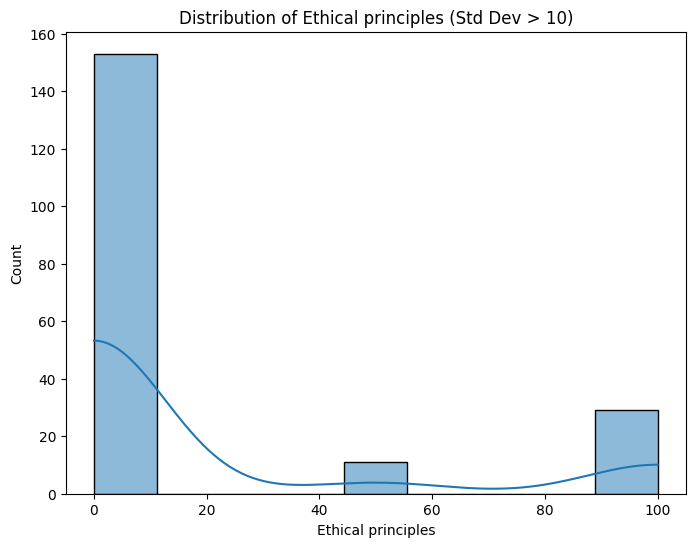

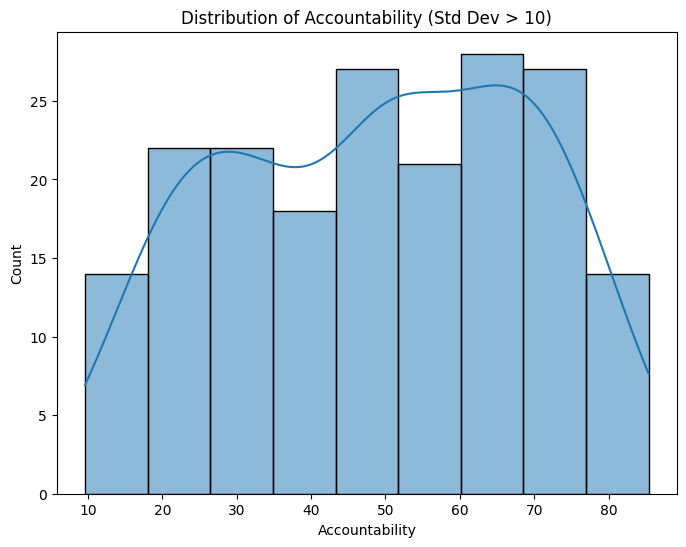

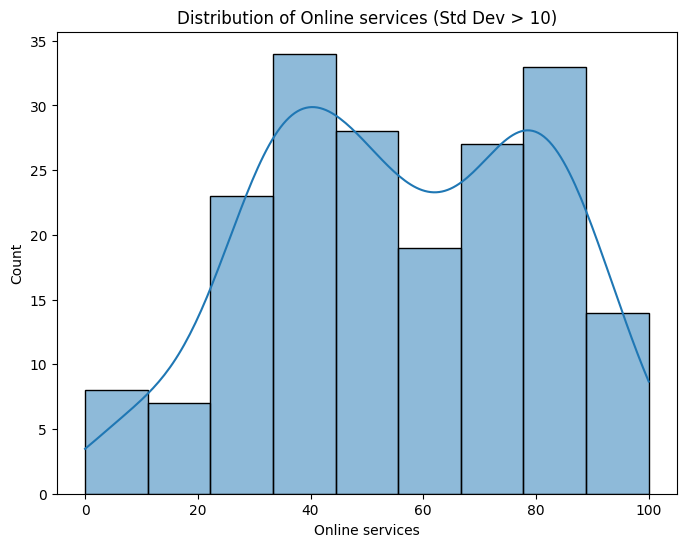

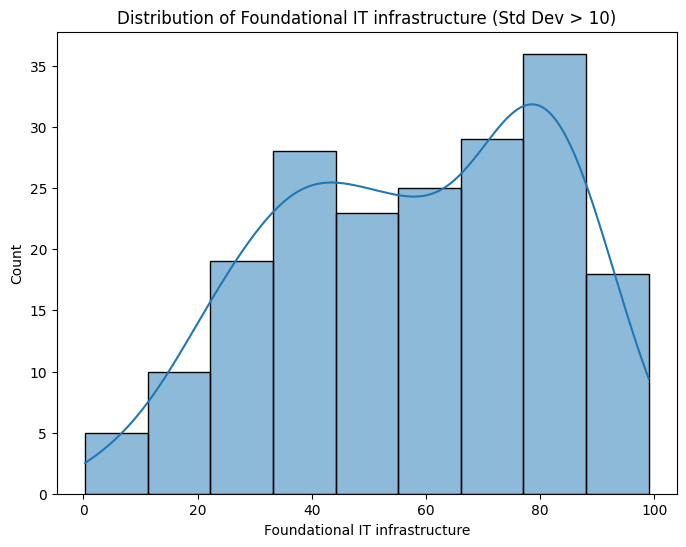

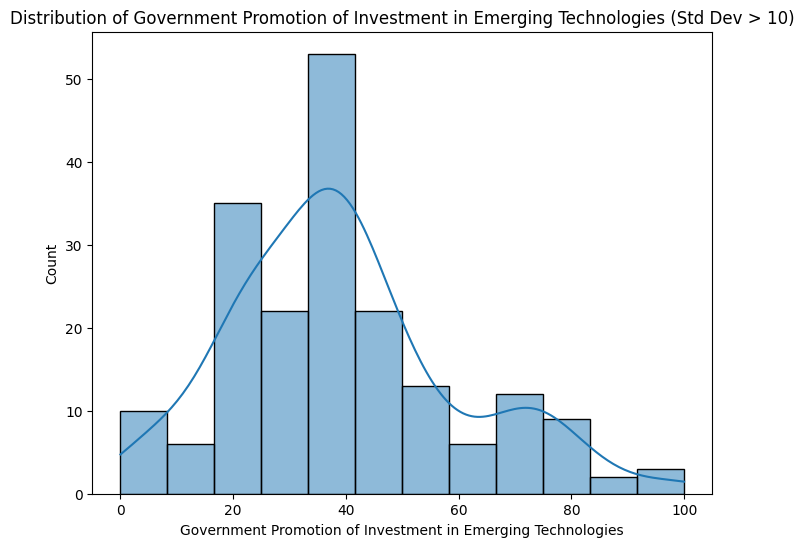

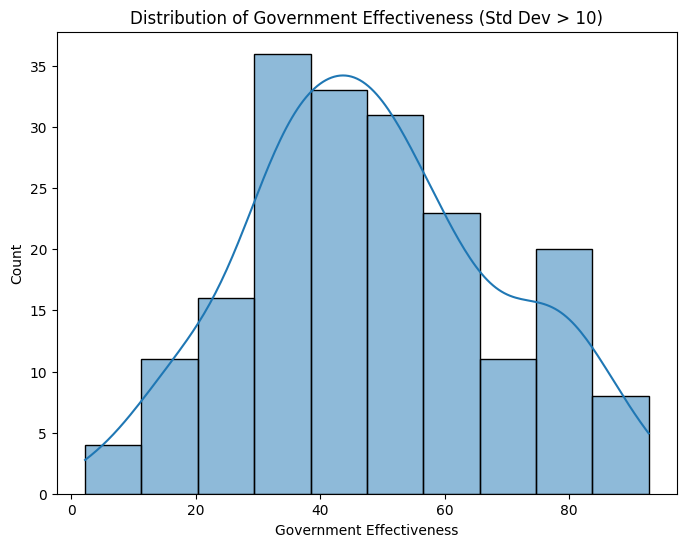

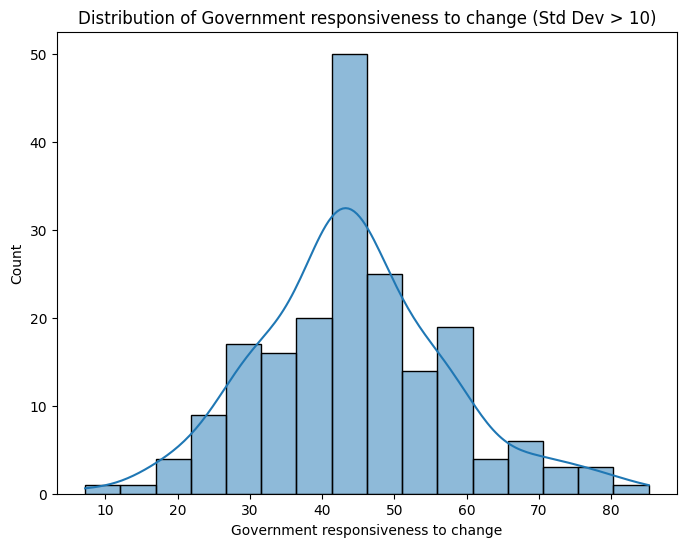

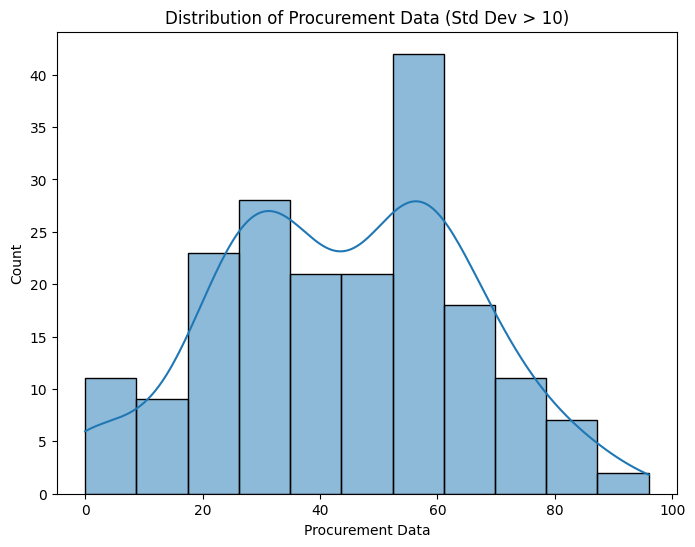

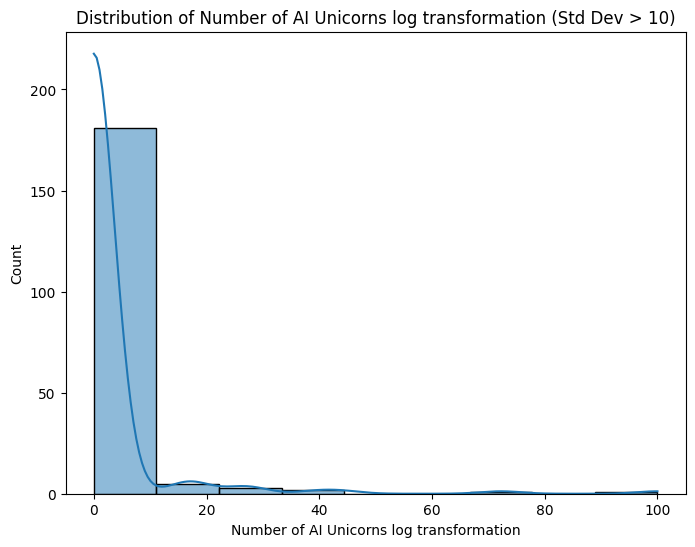

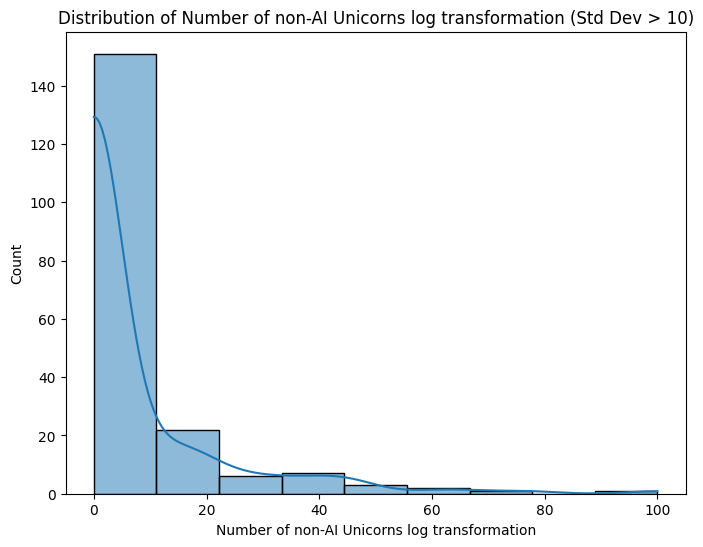

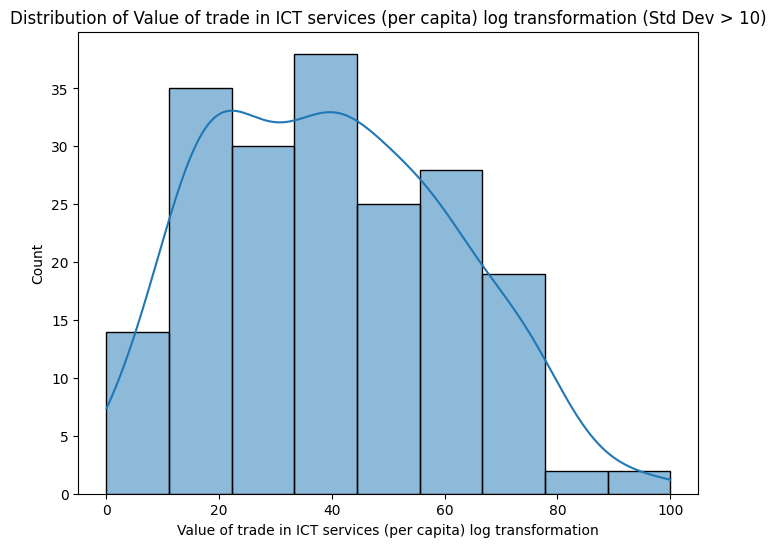

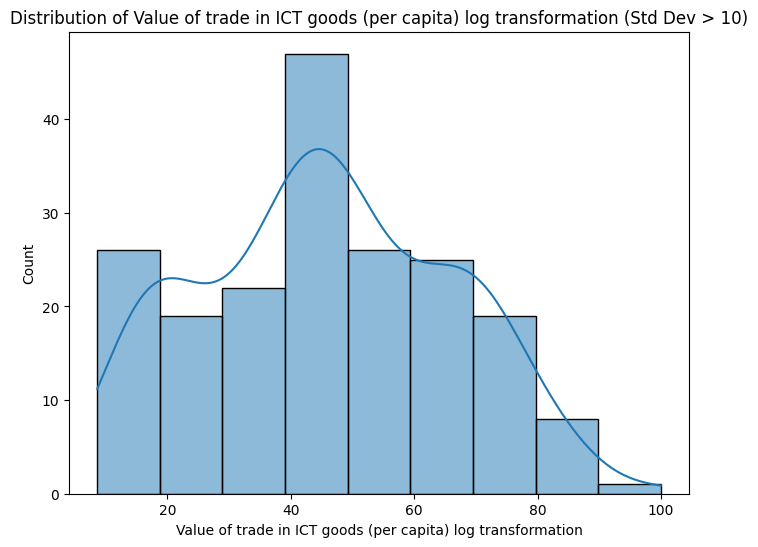

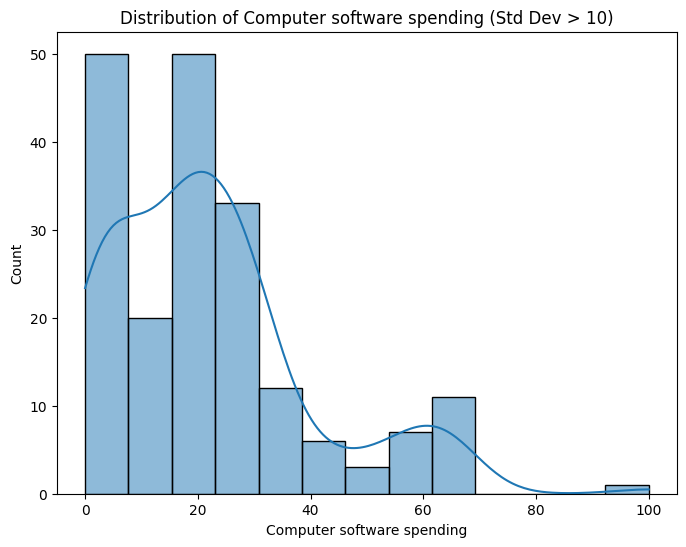

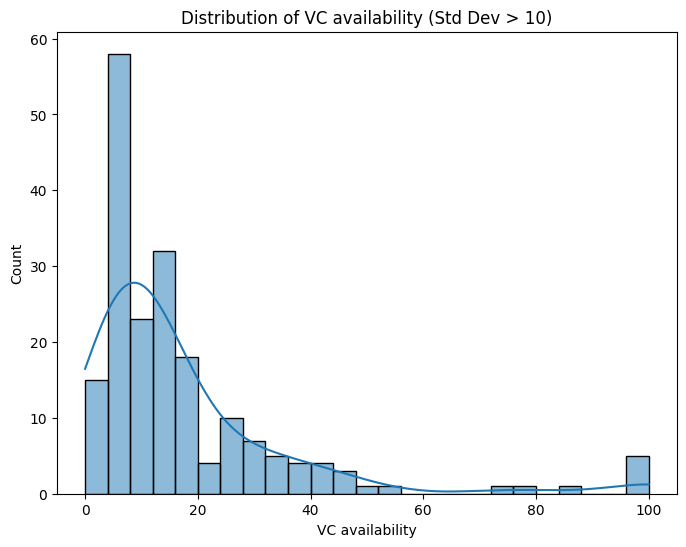

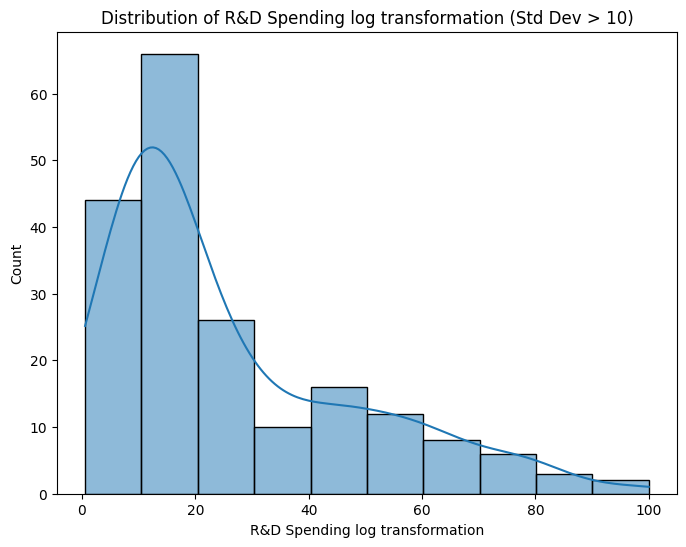

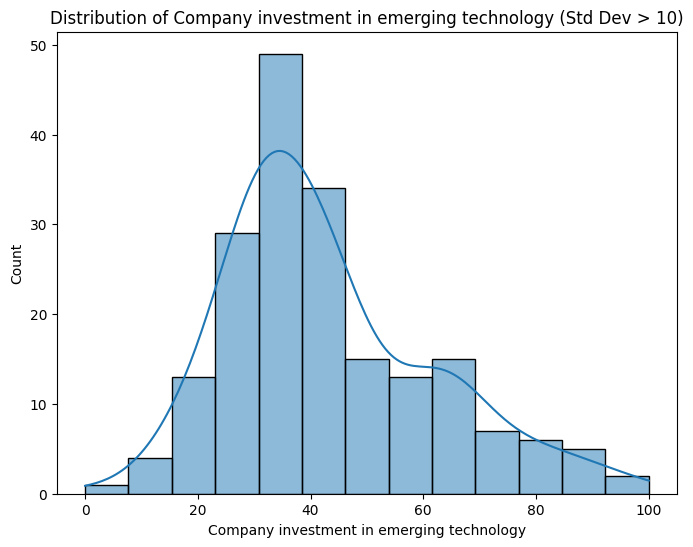

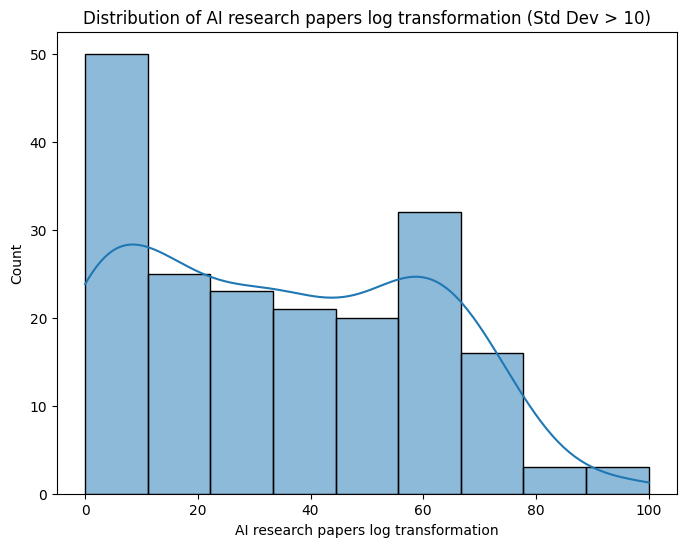

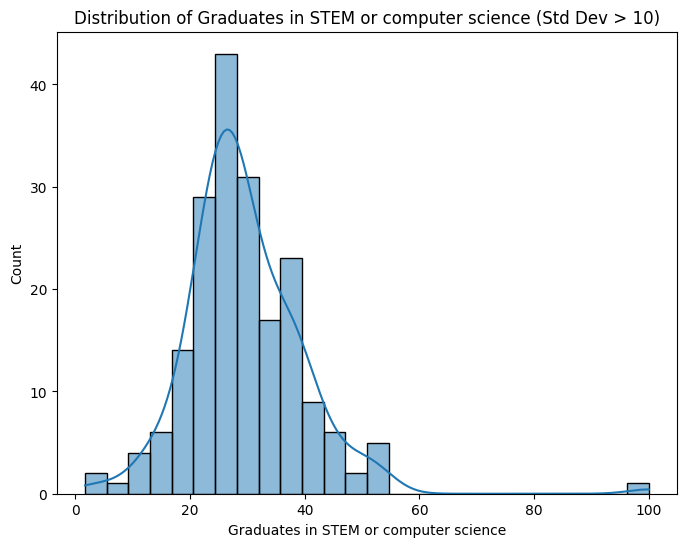

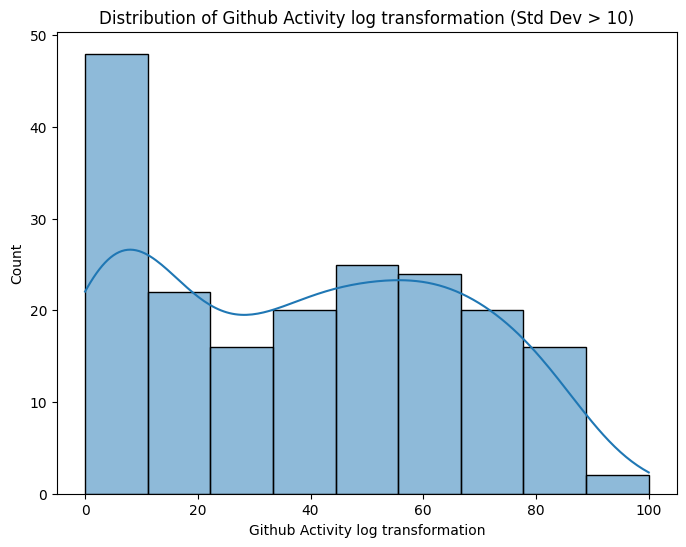

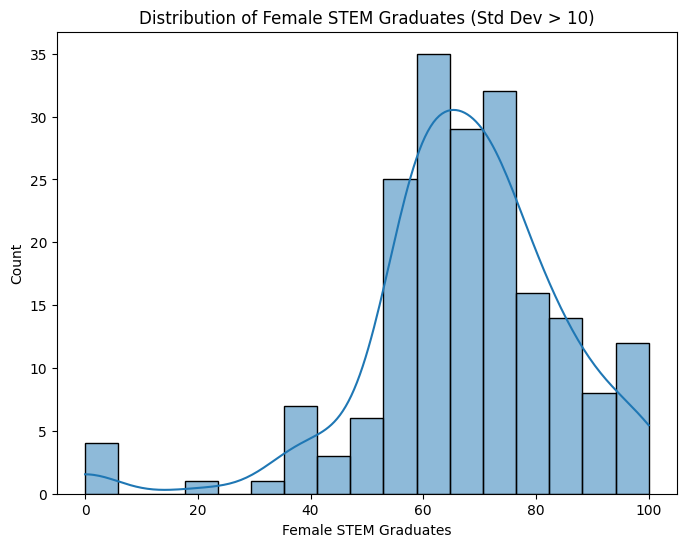

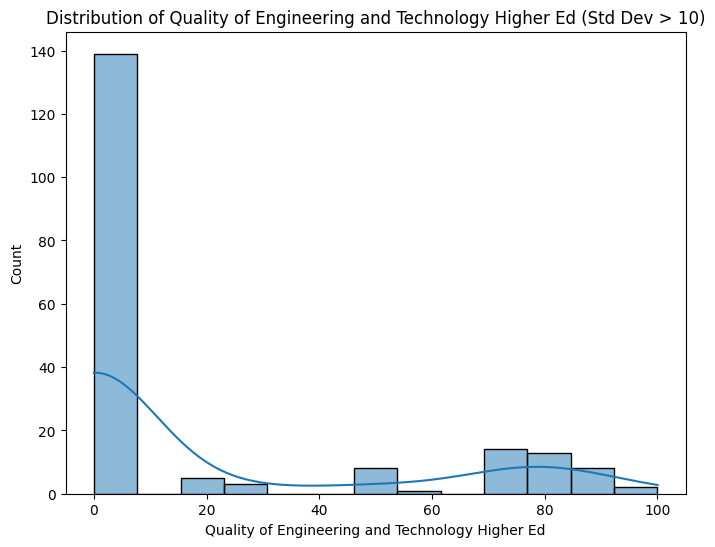

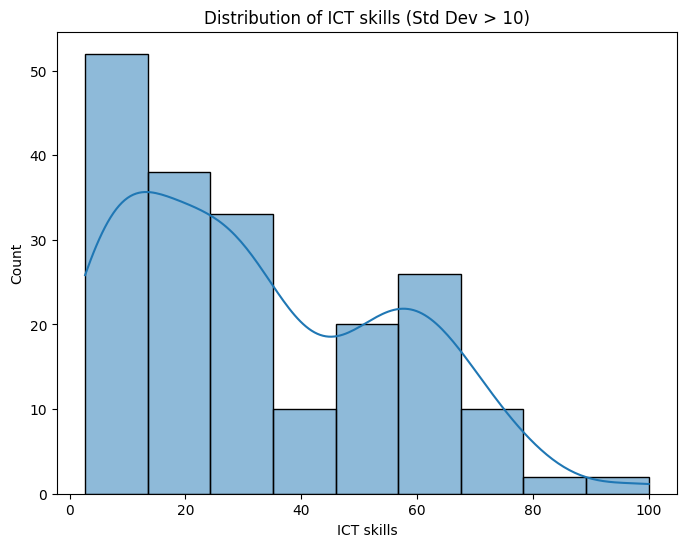

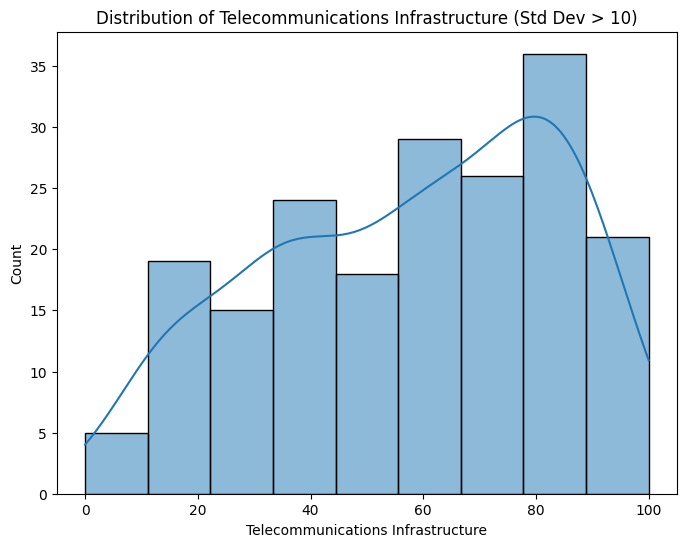

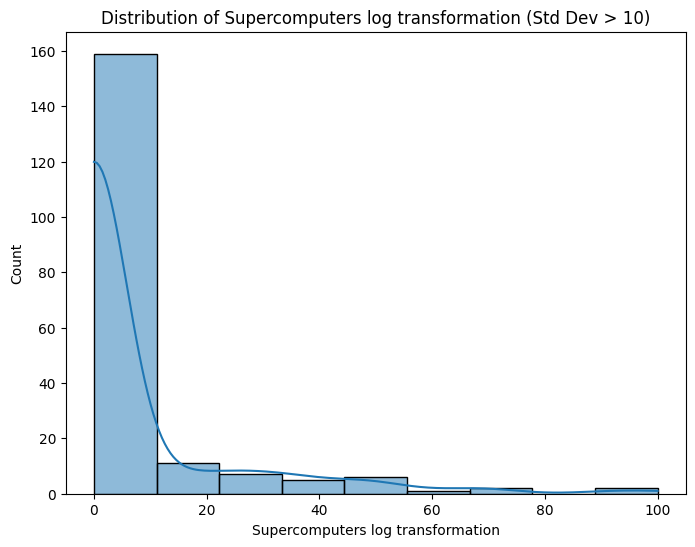

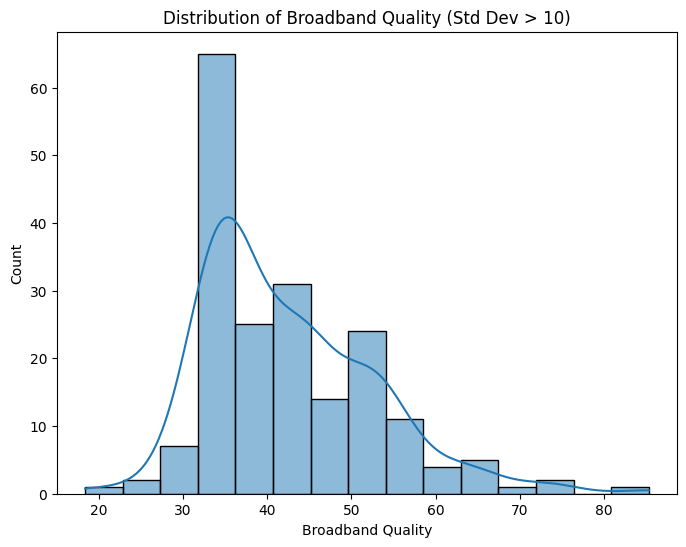

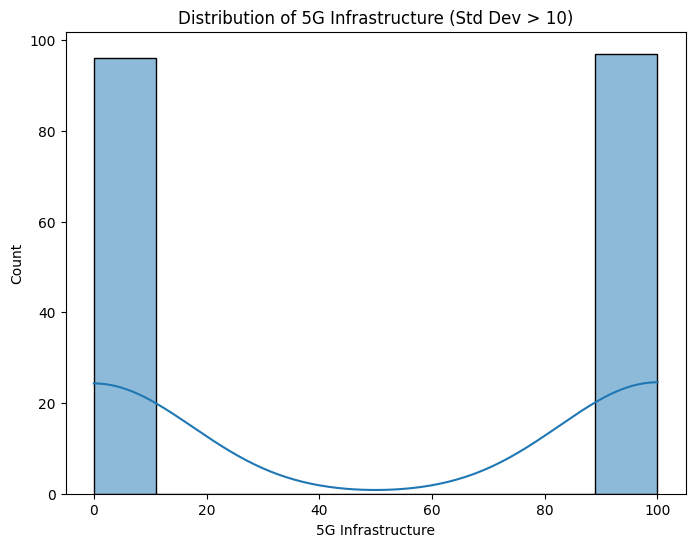

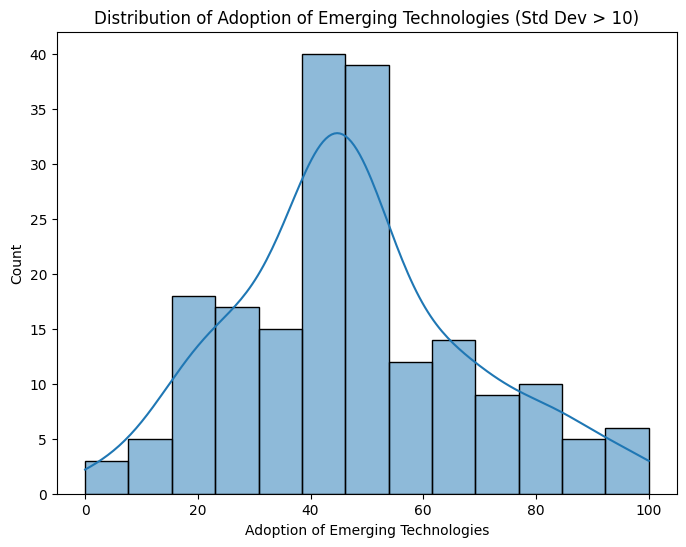

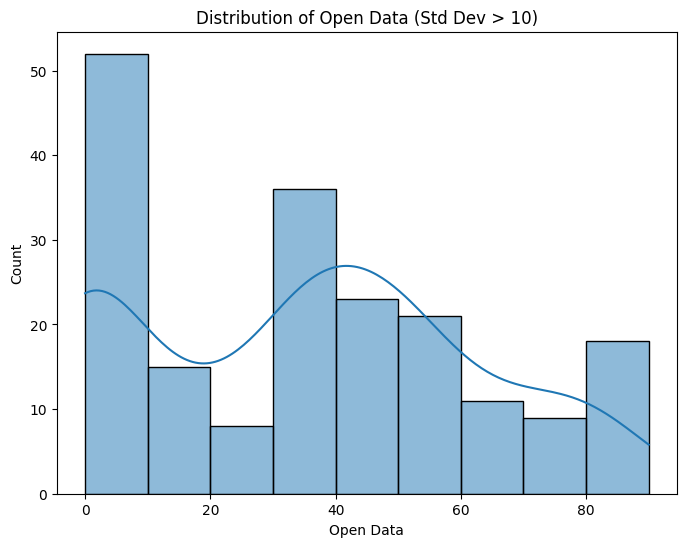

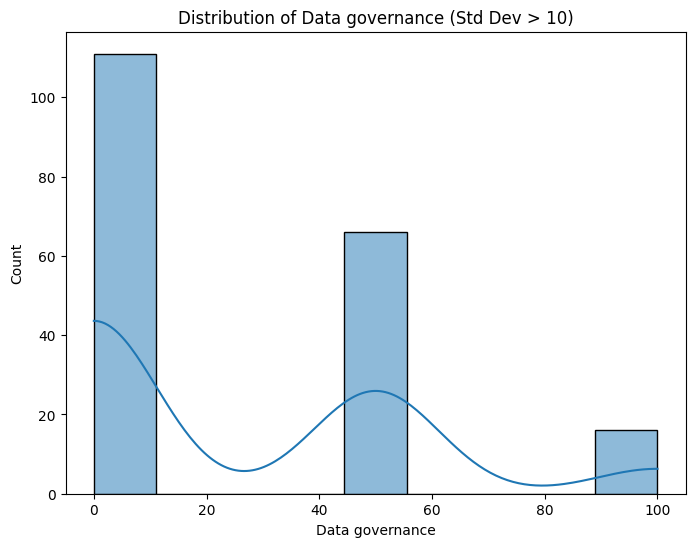

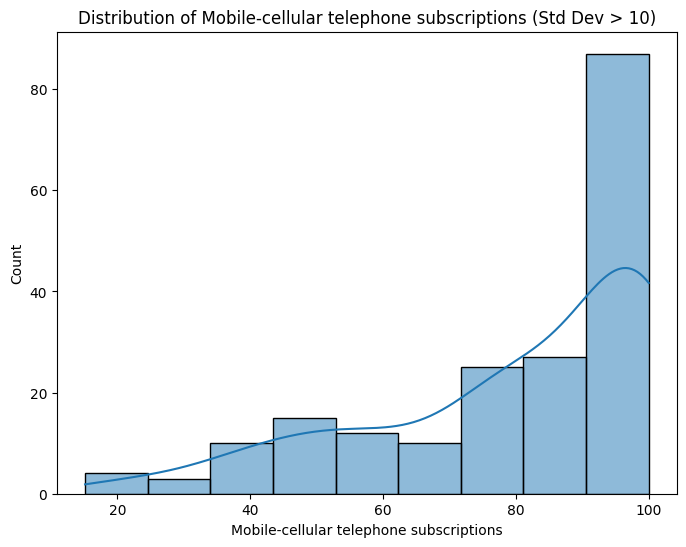

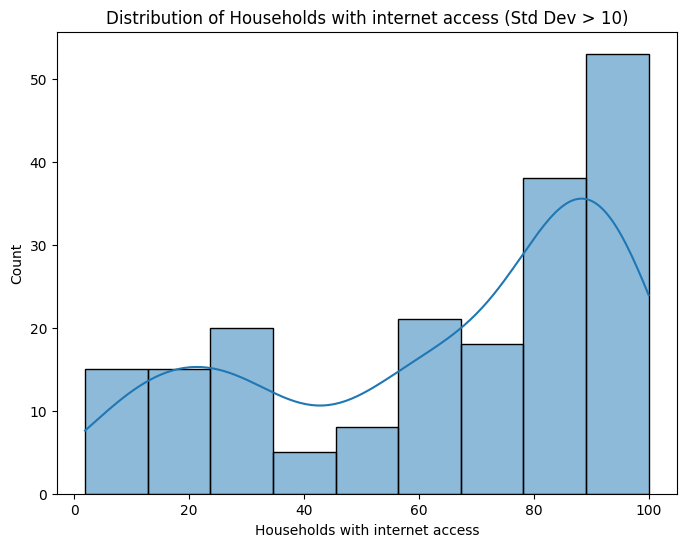

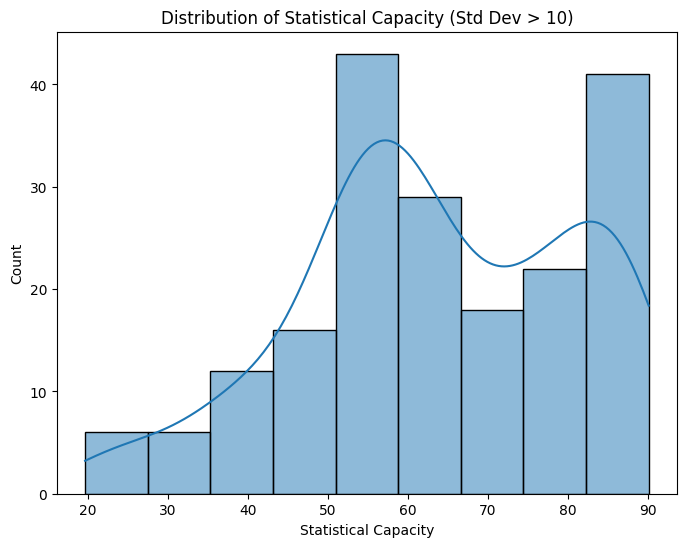

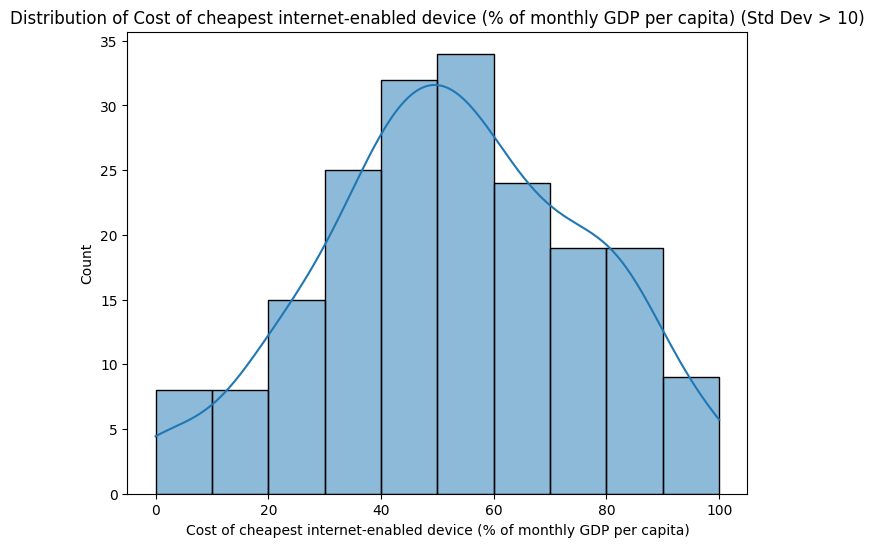

In [10]:
# prompt: base on data distribution only graph the numerical variables with the wider standar deviation

# Calculate the standard deviation for numerical features
std_devs = data.select_dtypes(include=np.number).std()

# Set a threshold for standard deviation (adjust as needed)
std_dev_threshold = 10  # You can change this value based on your data

# Filter features based on standard deviation
features_to_graph = std_devs[std_devs > std_dev_threshold].index

# Loop through selected features and create histograms
for feature in features_to_graph:
  plt.figure(figsize=(8, 6))
  sns.histplot(data[feature], kde=True)
  plt.title(f"Distribution of {feature} (Std Dev > {std_dev_threshold})")
  plt.show()

In [12]:
# Separate the target variable and features
X = data.drop(columns=['Country', 'IA Government Readiness'])
y = data['IA Government Readiness']

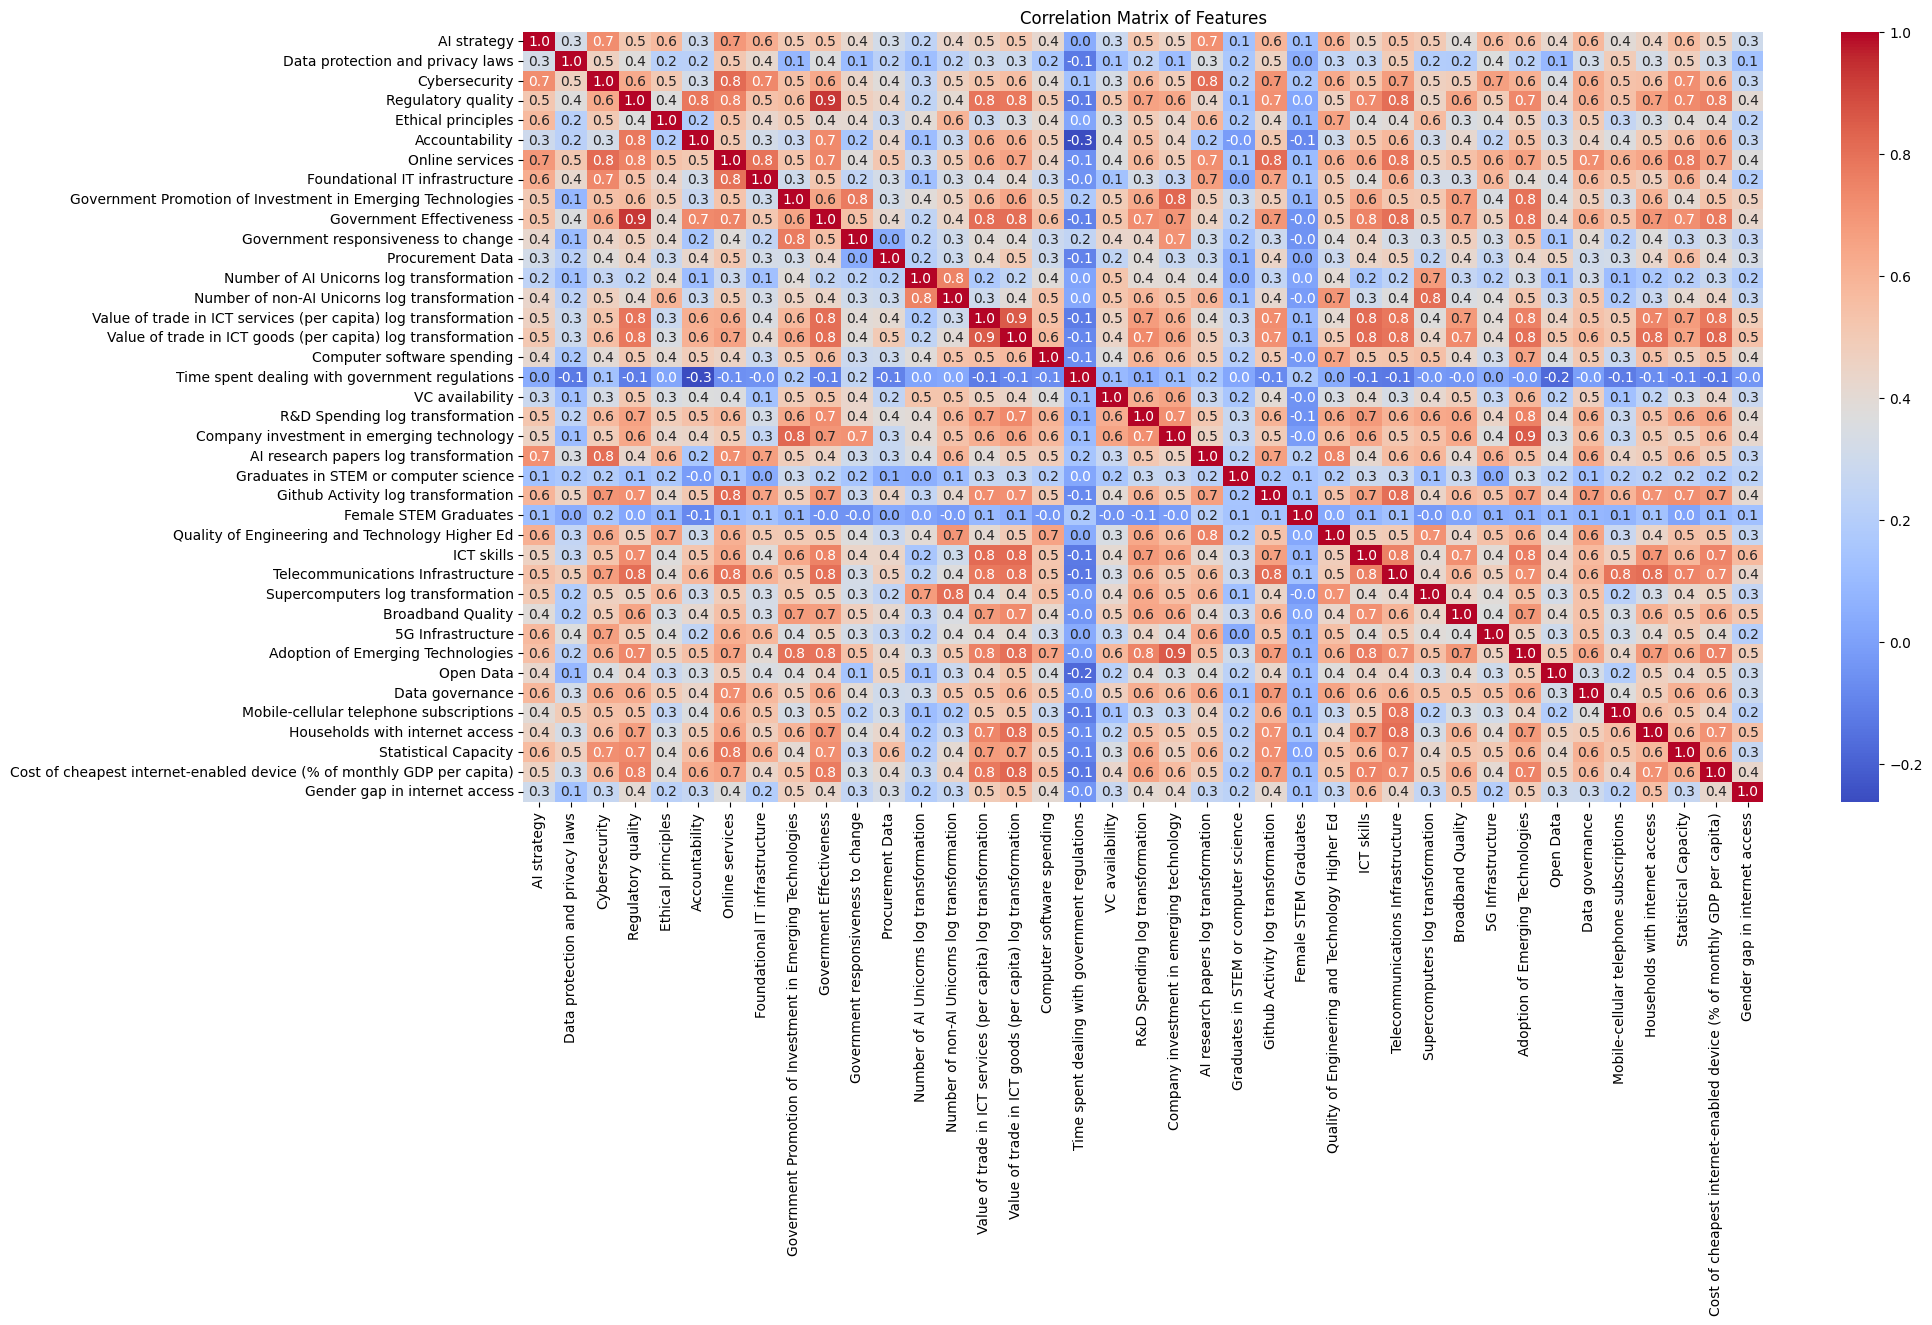

In [13]:
#correlation matrix of X heatmat

correlation_matrix = X.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Matrix of Features')
plt.show()

#**CLUSTER ANALYSIS**

---



In [14]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

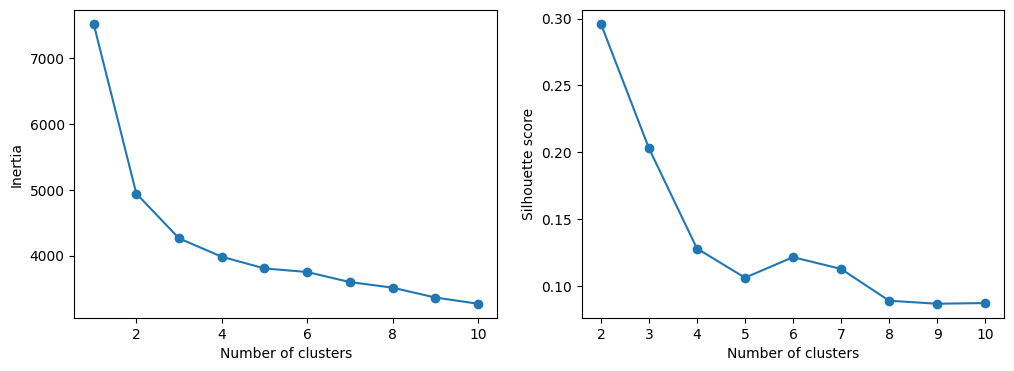

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []  # inertia
ss = []  # silhouette score
test_clusters = 10
for cluster in range(1,test_clusters+1):
    kmeans = KMeans(n_clusters=cluster, n_init="auto", random_state=12345)
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)
    labels = kmeans.predict(data_scaled)
    if cluster > 1:
        ss.append(silhouette_score(data_scaled, labels))

# converting the results into a dataframe and plotting them
frame_in = pd.DataFrame({'Cluster':range(1,test_clusters+1), 'SSE':SSE})
frame_ss = pd.DataFrame({'Cluster':range(2,test_clusters+1), 'Silhouette score': ss})
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(frame_in['Cluster'], frame_in['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
#plt.xticks(frame.Cluster[1::2]);
plt.subplot(1,2,2)
plt.plot(frame_ss['Cluster'], frame_ss['Silhouette score'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # dos componentes principales

principalComponents = pca.fit_transform(data_scaled)

pc_transformation = pd.DataFrame(data = principalComponents,
                           columns = ['PC1', 'PC2'])

# cuatro clusters para KMeans, en su análisis no incluya random_state
kmeans = KMeans(n_clusters=4, n_init="auto", random_state=12345).fit(data_scaled)

# agregamos la columna cluster a nuestros datos originales
data_cl = data.copy()
data_cl["Cluster"] = kmeans.labels_.astype('str')
data_cl.head()

pc_transformation['Cluster'] = kmeans.labels_.astype('str')

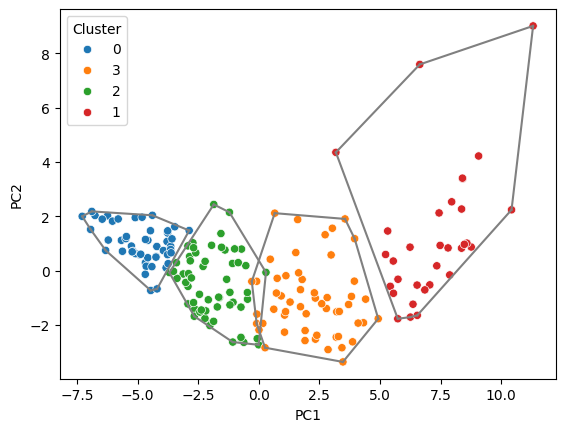

In [17]:
from scipy.spatial import ConvexHull

def plot_convex_hull(data_hull, cl_col, colx="PC1", coly="PC2"):
    # Usa colx, coly para el scatterplot
    #cl_method: nombre de la columna de resultados de clustering, se usa para el hue
    # color, lista de colores, tantos como clusteres
    sns.scatterplot(x=data_hull[colx], y=data_hull[coly], hue=data_hull[cl_col])

    for ci in np.unique(data_hull[cl_col]):

        points = np.array(data_hull[[colx, coly]])
        points = points[np.where(data_hull[cl_col] == ci)[0]]
        hull = ConvexHull(points)
        for simplex in hull.simplices:
            plt.plot(points[simplex, 0], points[simplex, 1], 'grey')

plot_convex_hull(pc_transformation, 'Cluster')
plt.show()

In [18]:
data_cl.head()

Country  IA Government Readiness  AI strategy  \
0  Afghanistan                21.268713            0   
1      Albania                43.262394            0   
2      Algeria                35.988109            0   
3      Andorra                46.254249            0   
4       Angola                29.140256            0   

   Data protection and privacy laws  Cybersecurity  Regulatory quality  \
0                               0.0           5.20                24.6   
1                             100.0          64.32                53.2   
2                             100.0          33.95                28.8   
3                             100.0          26.38                78.0   
4                             100.0          12.99                37.8   

   Ethical principles  Accountability  Online services  \
0                   0            15.0            27.70   
1                   0            52.8            81.82   
2                   0            30.0            37.43   
3                   0            72.0            51.33   
4                   0            34.0            47.16   

   Foundational IT infrastructure  ...  5G Infrastructure  \
0                            41.5  ...                100   
1                            70.7  ...                  0   
2                            49.3  ...                  0   
3                            19.6  ...                  0   
4                            43.6  ...                100   

   Adoption of Emerging Technologies  Open Data  Data governance  \
0                          47.281960  34.666674                0   
1                          19.180000  40.000000               50   
2                          47.150000  35.750000                0   
3                          66.512414  48.105263                0   
4                          16.410000   0.000000               50   

   Mobile-cellular telephone subscriptions  Households with internet access  \
0                                43.538462                         8.770000   
1                                75.307692                        96.500000   
2                                84.000000                        73.057117   
3                               100.000000                        94.460000   
4                                51.846154                         9.580000   

   Statistical Capacity  \
0             49.756250   
1             75.382917   
2             55.149167   
3             84.972830   
4             54.945833   

   Cost of cheapest internet-enabled device (% of monthly GDP per capita)  \
0                                          19.260000                        
1                                          52.060000                        
2                                          35.010000                        
3                                          79.269655                        
4                                          54.210000                        

   Gender gap in internet access  Cluster  
0                      92.992899        0  
1                      95.000000        3  
2                      94.000000        2  
3                      96.473684        3  
4                      89.500000        0  

[5 rows x 42 columns]

In [19]:

# Calculate the average of each feature by cluster, but only include numeric features.
cluster_profiles = data_cl.groupby('Cluster').mean(numeric_only=True)

# Display the cluster profiles to understand the characteristics of each cluster
print(cluster_profiles)

         IA Government Readiness  AI strategy  \
Cluster                                         
0                      26.176359     3.061224   
1                      71.757852    90.625000   
2                      37.439357    16.379310   
3                      54.145772    59.259259   

         Data protection and privacy laws  Cybersecurity  Regulatory quality  \
Cluster                                                                        
0                               55.437033      20.721020           27.171429   
1                               95.982143      94.777589           75.793750   
2                               72.536946      34.239655           42.689655   
3                               96.693122      76.971534           57.537037   

         Ethical principles  Accountability  Online services  \
Cluster                                                        
0                  0.000000       31.008163        28.501633   
1                 62.500000     

In [ ]:
# Group clusters by country
cluster_by_country = data_cl.groupby(['Country', 'Cluster']).size().unstack().fillna(0)

# Display the grouped data
print(cluster_by_country)

Cluster                              0    1    2    3
Country                                              
Afghanistan                        1.0  0.0  0.0  0.0
Albania                            0.0  0.0  0.0  1.0
Algeria                            0.0  0.0  1.0  0.0
Andorra                            0.0  0.0  0.0  1.0
Angola                             1.0  0.0  0.0  0.0
...                                ...  ...  ...  ...
Venezuela, Bolivarian Republic of  1.0  0.0  0.0  0.0
Viet Nam                           0.0  0.0  0.0  1.0
Yemen                              1.0  0.0  0.0  0.0
Zambia                             1.0  0.0  0.0  0.0
Zimbabwe                           1.0  0.0  0.0  0.0

[193 rows x 4 columns]


In [ ]:
# Group clusters by country
cluster_by_country = data_cl.groupby(['Country', 'Cluster']).size().unstack().fillna(0)

# Get a list of countries for each cluster
for cluster in cluster_by_country.columns:
    countries_in_cluster = cluster_by_country[cluster_by_country[cluster] > 0].index.tolist()
    print(f"Countries in Cluster {cluster}:")
    for country in countries_in_cluster:
        print(f"  - {country}")
    print("\n")

Countries in Cluster 0:
  - Afghanistan
  - Angola
  - Burkina Faso
  - Burundi
  - Cameroon
  - Central African Republic
  - Chad
  - Comoros
  - Congo
  - Democratic People's Republic of Korea
  - Democratic Republic of the Congo
  - Djibouti
  - Equatorial Guinea
  - Eritrea
  - Eswatini
  - Ethiopia
  - Gambia (Republic of The)
  - Guinea
  - Guinea Bissau
  - Haiti
  - Kiribati
  - Lesotho
  - Liberia
  - Libya
  - Madagascar
  - Malawi
  - Mali
  - Mauritania
  - Mozambique
  - Myanmar
  - Nicaragua
  - Niger
  - Papua New Guinea
  - Sao Tome and Principe
  - Sierra Leone
  - Solomon Islands
  - Somalia
  - South Sudan
  - State of Palestine
  - Sudan
  - Syrian Arab Republic
  - Tajikistan
  - Togo
  - Turkmenistan
  - United Republic of Tanzania
  - Venezuela, Bolivarian Republic of
  - Yemen
  - Zambia
  - Zimbabwe


Countries in Cluster 1:
  - Australia
  - Austria
  - Belgium
  - Canada
  - China
  - Denmark
  - Estonia
  - Finland
  - France
  - Germany
  - Iceland
  - Indi

In [21]:
import pandas as pd

# ... (your previous code) ...

# Group clusters by country
cluster_by_country = data_cl.groupby(['Country', 'Cluster']).size().unstack().fillna(0)

# Create a dictionary to store cluster data
cluster_data = {}

# Get a list of countries for each cluster and store in the dictionary
for cluster in cluster_by_country.columns:
    countries_in_cluster = cluster_by_country[cluster_by_country[cluster] > 0].index.tolist()
    cluster_data[f"Cluster {cluster}"] = countries_in_cluster

# Create a DataFrame from the cluster data
excel_table = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in cluster_data.items()]))

# Display the table
print(excel_table.to_string())

excel_table.to_excel('/content/drive/My Drive/cluster_countries.xlsx', index=False)

                                Cluster 0                                             Cluster 1                         Cluster 2            Cluster 3
0                             Afghanistan                                             Australia                           Algeria              Albania
1                                  Angola                                               Austria               Antigua and Barbuda              Andorra
2                            Burkina Faso                                               Belgium                           Bahamas            Argentina
3                                 Burundi                                                Canada                        Bangladesh              Armenia
4                                Cameroon                                                 China                          Barbados           Azerbaijan
5                Central African Republic                                               Denmar

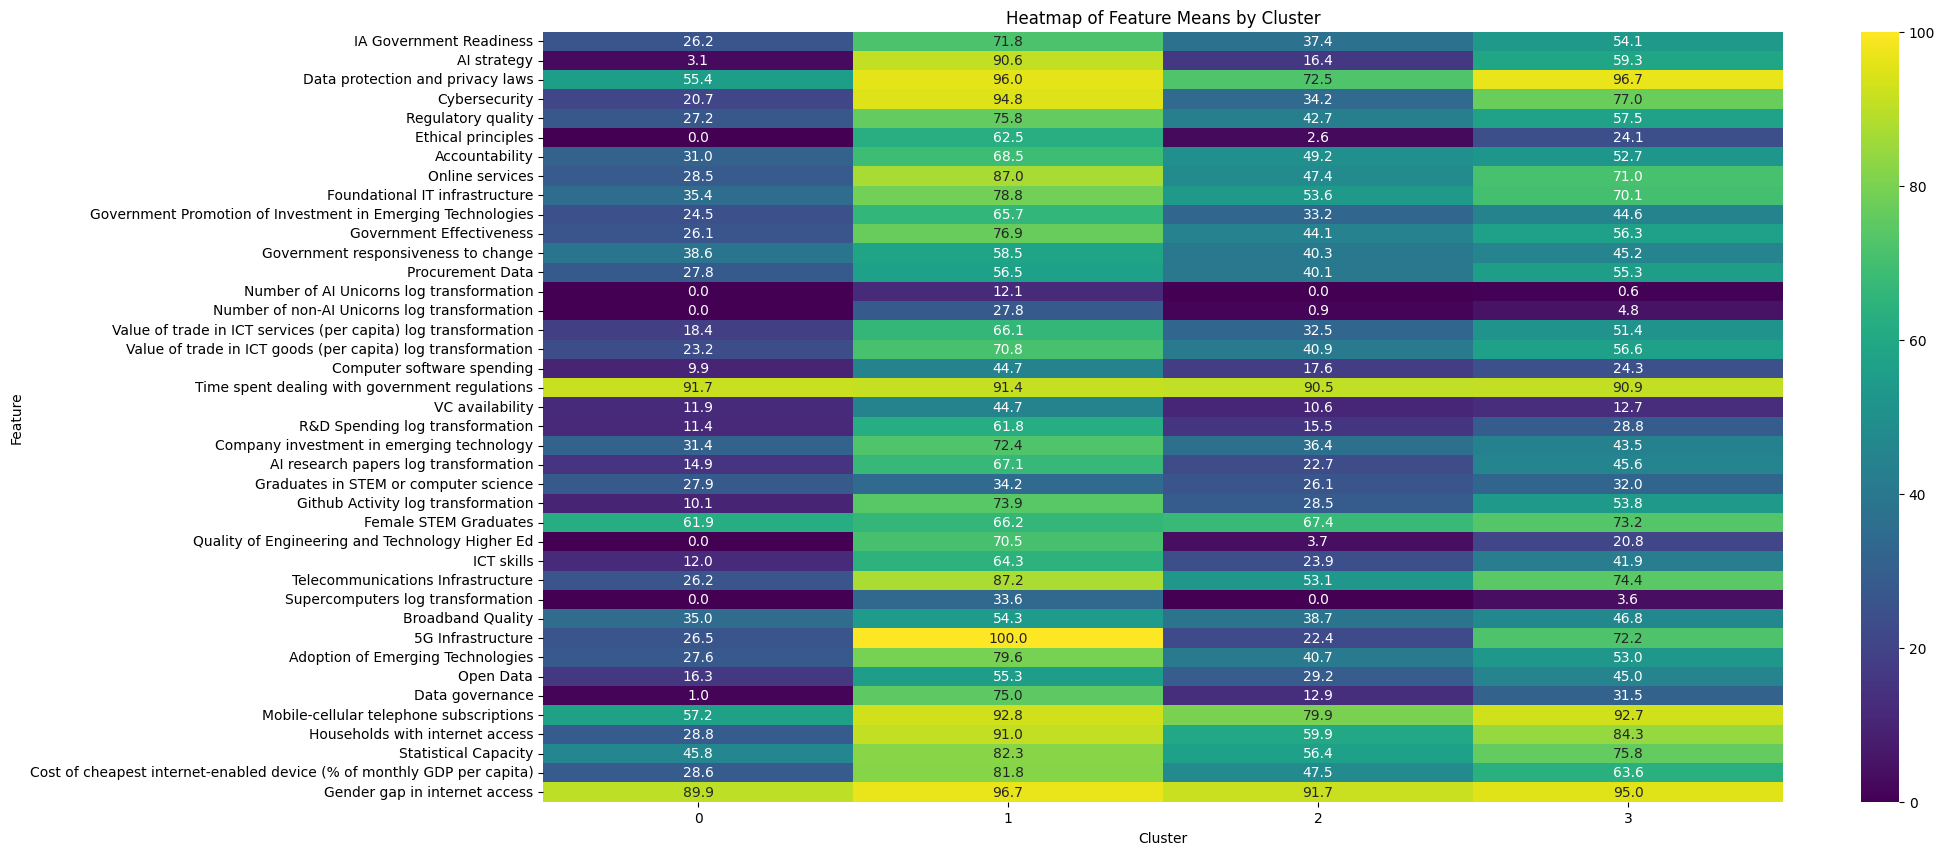

In [ ]:
#CLUSTER PROFILES (FEATURE MEANS) WITH ALL VARIABLES

cluster_profiles = data_cl.groupby('Cluster').agg({col: 'mean' for col in data_cl.select_dtypes(include=['number']).columns}).T
# Use agg() to specify 'mean' for numeric columns only
# select_dtypes() to filter for numeric columns before calculating the mean.

# Create the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(cluster_profiles, cmap="viridis", annot=True, fmt=".1f", cbar=True)
plt.title("Heatmap of Feature Means by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Feature")
plt.show()

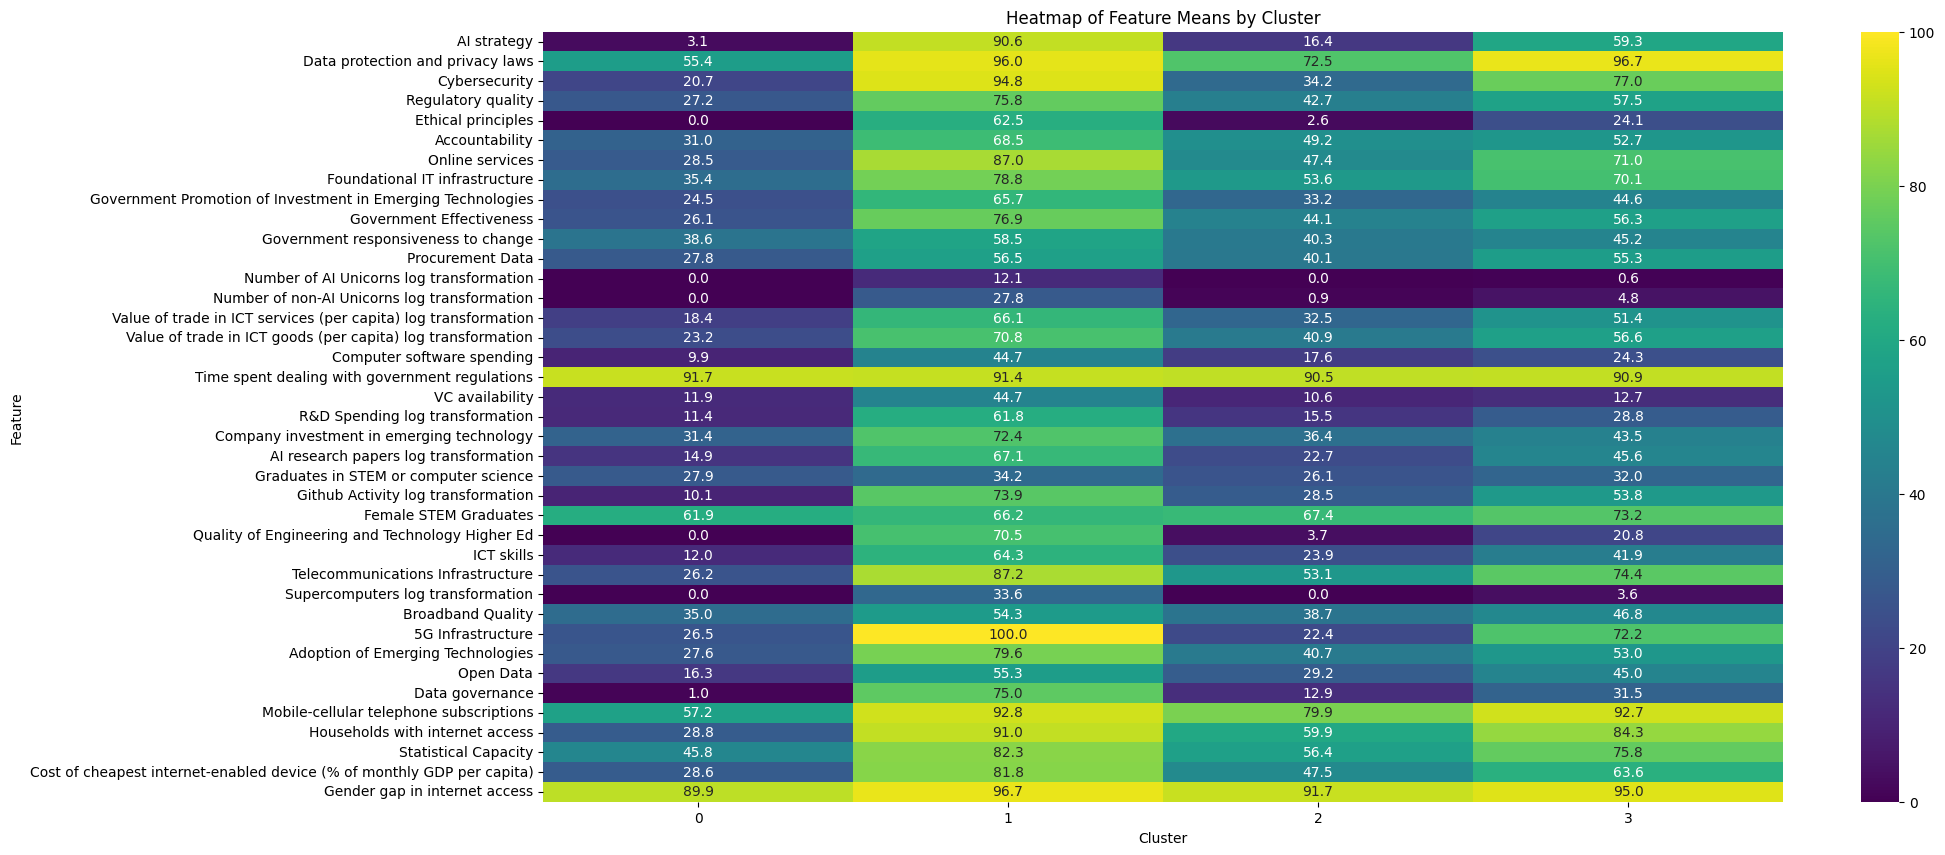

In [ ]:
#CLUSTER PROFILES (FEATURE MEANS) WITHOUT IA GOVERNMENT READINESS AND CLUSTER

# Select only numeric columns, excluding 'IA Government Readiness' and 'Cluster'
features_to_include = [col for col in data_cl.select_dtypes(include=['number']).columns
                       if col not in ['IA Government Readiness', 'Cluster']]

# Calculate cluster profiles for the selected features
cluster_profiles = data_cl.groupby('Cluster').agg({col: 'mean' for col in features_to_include}).T

# Create the heatmap (rest of the heatmap code remains the same)
plt.figure(figsize=(20, 10))
sns.heatmap(cluster_profiles, cmap="viridis", annot=True, fmt=".1f", cbar=True)
plt.title("Heatmap of Feature Means by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Feature")
plt.show()

In [ ]:
# Create a dictionary to map cluster labels to AI adoption levels
ai_adoption_mapping = {
    '0': 'Low AI adoption',
    '1': 'High AI adoption',
    '2': 'Moderate-Low AI adoption',
    '3': 'Intermediate AI adoption'
}

# Add a new column 'IA Adoption Level' based on the 'Cluster' column
data_cl['IA Adoption Level'] = data_cl['Cluster'].map(ai_adoption_mapping)

data_cl.head(100)

Country  IA Government Readiness  AI strategy  \
0     Afghanistan                21.268713            0   
1         Albania                43.262394            0   
2         Algeria                35.988109            0   
3         Andorra                46.254249            0   
4          Angola                29.140256            0   
..            ...                      ...          ...   
95        Lesotho                26.209041            0   
96        Liberia                22.243710            0   
97          Libya                25.311294            0   
98  Liechtenstein                52.634484            0   
99      Lithuania                63.332254          100   

    Data protection and privacy laws  Cybersecurity  Regulatory quality  \
0                                0.0           5.20                24.6   
1                              100.0          64.32                53.2   
2                              100.0          33.95                28.8   
3                              100.0          26.38                78.0   
4                              100.0          12.99                37.8   
..                               ...            ...                 ...   
95                             100.0           9.08                37.6   
96                               0.0           9.72                30.4   
97                               0.0          28.78                 8.2   
98                             100.0          35.15                82.6   
99                             100.0          97.93                76.0   

    Ethical principles  Accountability  Online services  \
0                    0            15.0            27.70   
1                    0            52.8            81.82   
2                    0            30.0            37.43   
3                    0            72.0            51.33   
4                    0            34.0            47.16   
..                 ...             ...              ...   
95                   0            51.0            34.56   
96                   0            49.6            34.17   
97                   0            22.2             9.90   
98                   0            77.4            73.29   
99                   0            71.2            83.47   

    Foundational IT infrastructure  ...  Adoption of Emerging Technologies  \
0                             41.5  ...                          47.281960   
1                             70.7  ...                          19.180000   
2                             49.3  ...                          47.150000   
3                             19.6  ...                          66.512414   
4                             43.6  ...                          16.410000   
..                             ...  ...                                ...   
95                            46.5  ...                           0.000000   
96                            33.5  ...                          19.985833   
97                            15.6  ...                          47.281960   
98                            17.3  ...                          66.512414   
99                            82.2  ...                          65.180000   

    Open Data  Data governance  Mobile-cellular telephone subscriptions  \
0   34.666674                0                                43.538462   
1   40.000000               50                                75.307692   
2   35.750000                0                                84.000000   
3   48.105263                0                               100.000000   
4    0.000000               50                                51.846154   
..        ...              ...                                      ...   
95   0.750000                0                                51.923077   
96   0.000000                0                                24.461538   
97  38.000000                0                               100.000000   
98  

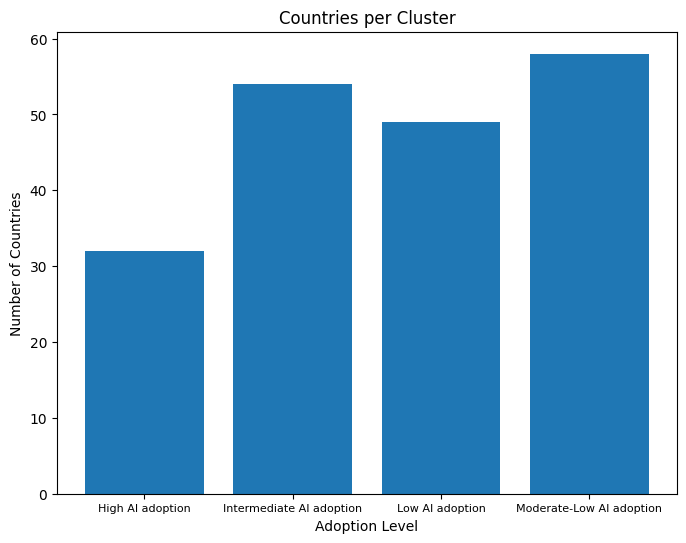

In [ ]:
#GRAPH NUMBER OF COUNTRIES PER CLUSTER

# Count the number of countries in each cluster
cluster_counts = data_cl.groupby('IA Adoption Level').size()

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(cluster_counts.index.astype(str), cluster_counts.values)
plt.xlabel('Adoption Level')
plt.xticks(fontsize=8)
plt.ylabel('Number of Countries')
plt.title('Countries per Cluster')
plt.show()

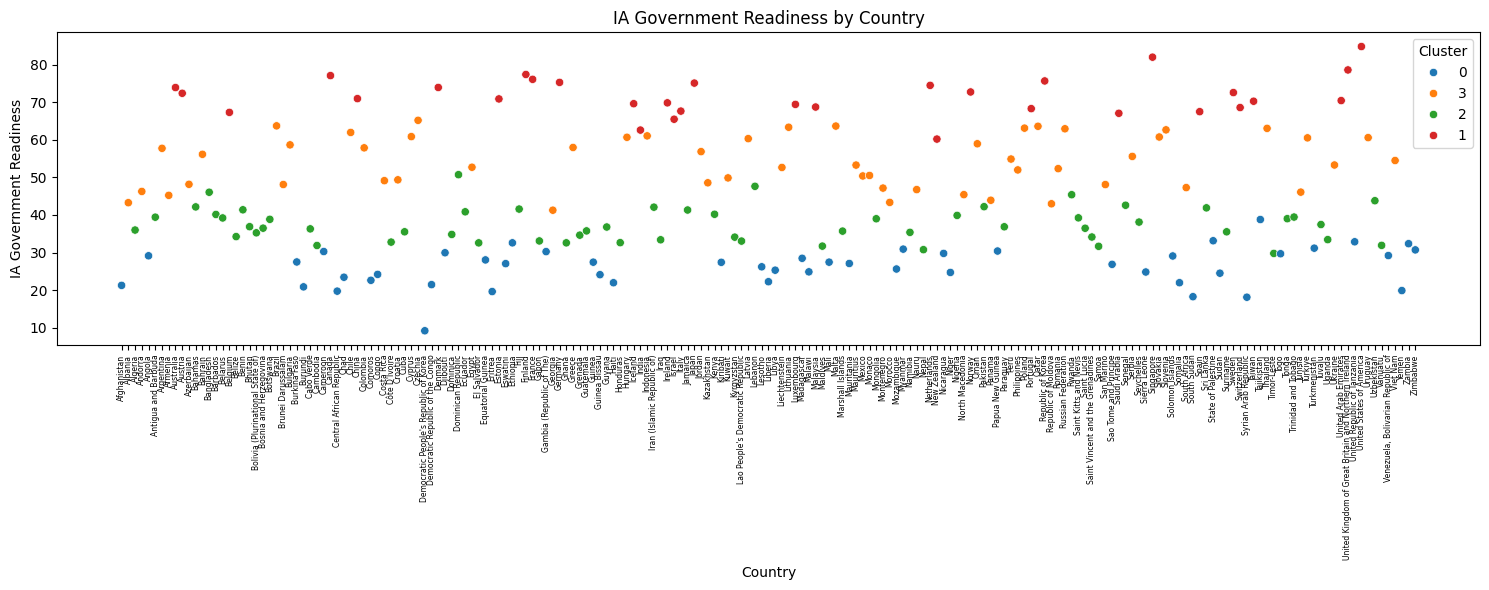

In [ ]:
# prompt: GRAPH IA GOVERNMENT READINESS AND COUNTRY USING CLUSTER AS LEGEND

# GRAPH IA GOVERNMENT READINESS AND COUNTRY USING CLUSTER AS LEGEND

plt.figure(figsize=(15, 6))
sns.scatterplot(x='Country', y='IA Government Readiness', hue='Cluster', data=data_cl)
plt.xticks(rotation=90 , fontsize=5.5)  # Rotate x-axis labels for better readability
plt.title('IA Government Readiness by Country')
plt.xlabel('Country')
plt.ylabel('IA Government Readiness')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

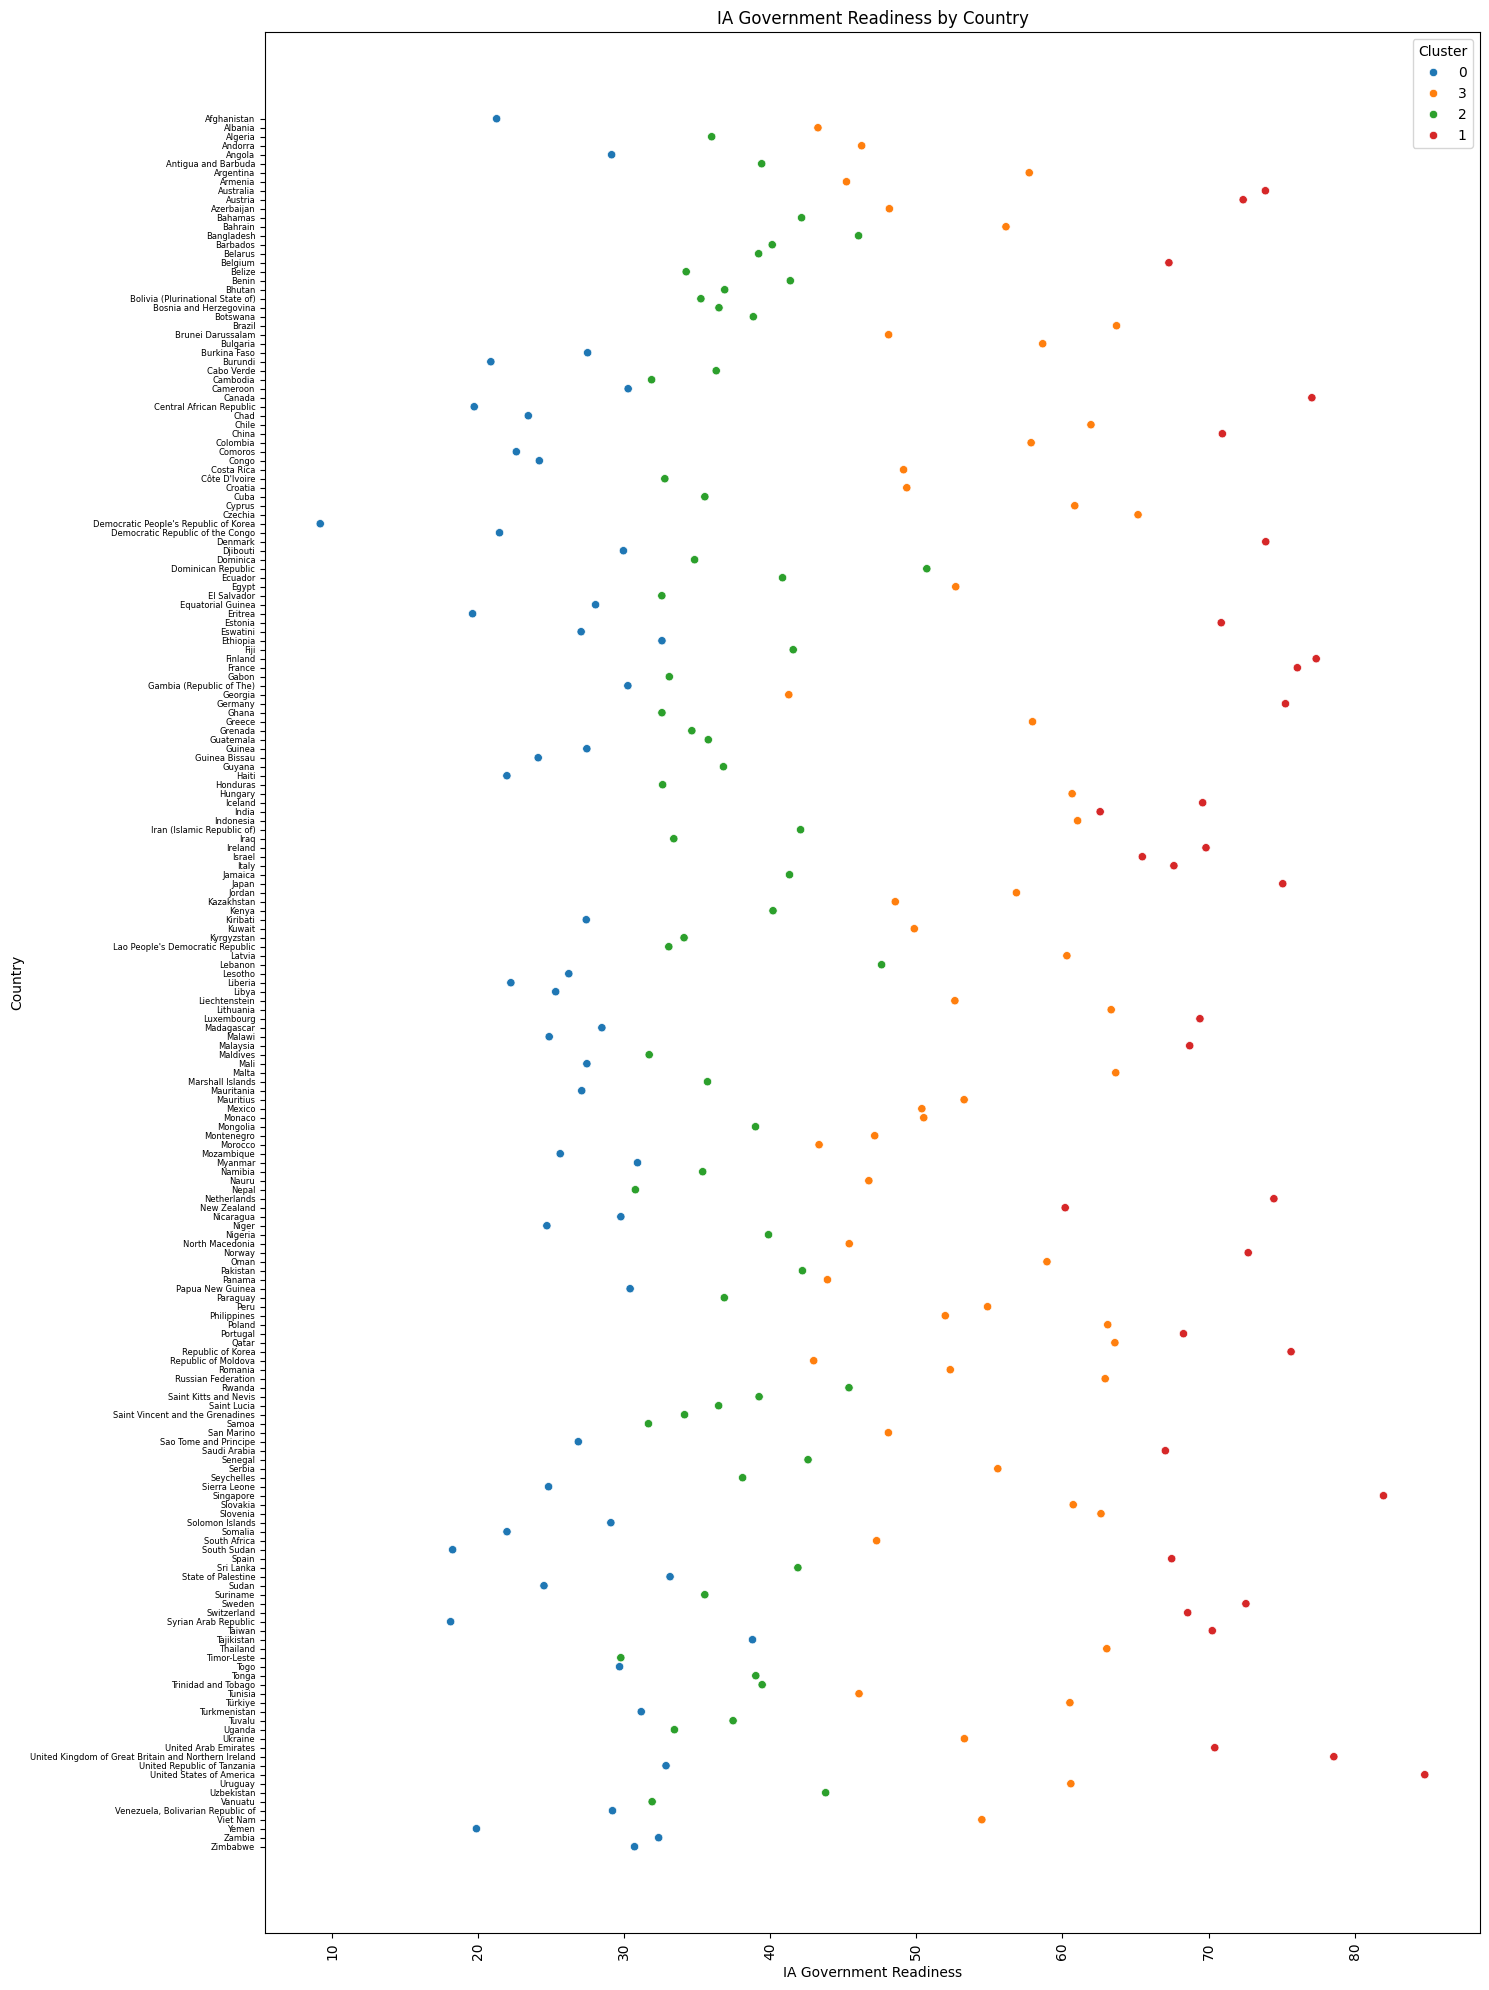

In [ ]:
plt.figure(figsize=(15, 20))
sns.scatterplot(x='IA Government Readiness', y='Country', hue='Cluster', data=data_cl)
plt.xticks(rotation=90 , fontsize=10)  # Rotate x-axis labels for better readability
plt.title('IA Government Readiness by Country')
plt.xlabel('IA Government Readiness')
plt.yticks(fontsize=6)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

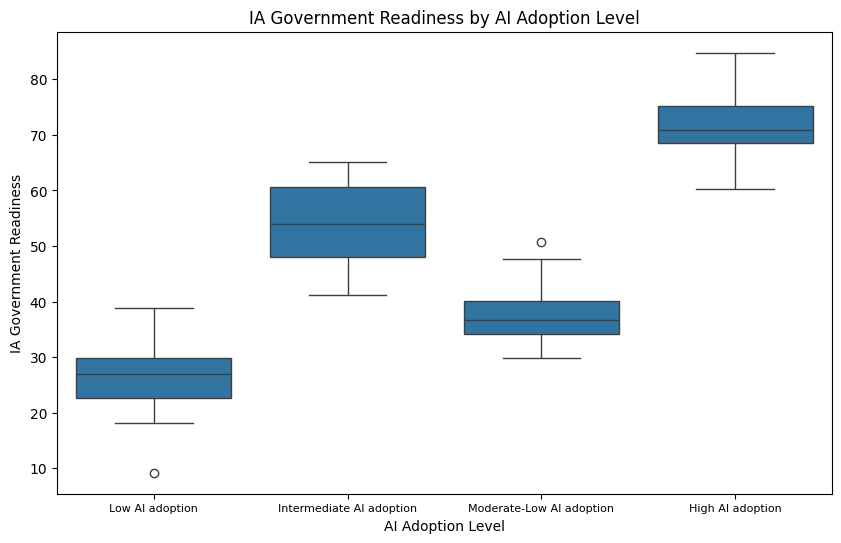

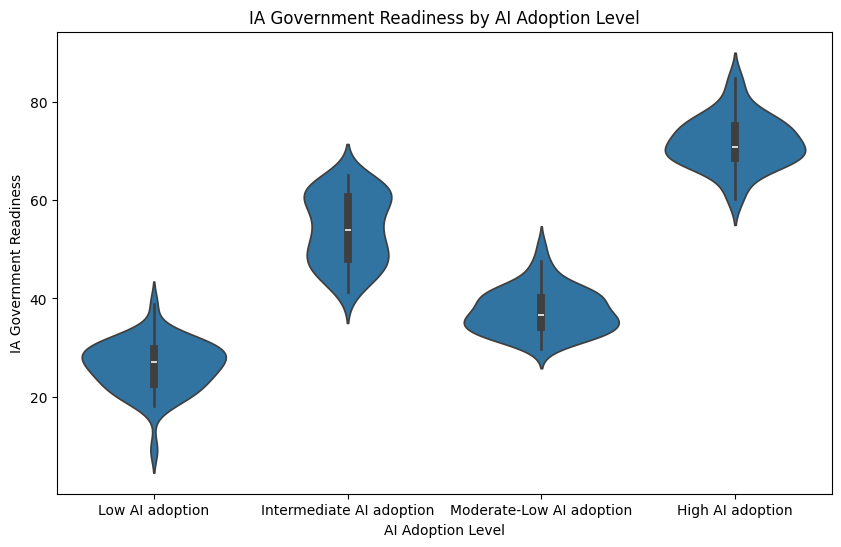

In [ ]:


# Create a box plot of IA Government Readiness by AI Adoption Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='IA Adoption Level', y='IA Government Readiness', data=data_cl)
plt.xticks(fontsize=8)
plt.title('IA Government Readiness by AI Adoption Level')
plt.xlabel('AI Adoption Level')
plt.ylabel('IA Government Readiness')
plt.show()

# Create a violin plot for a more detailed view of the distribution
plt.figure(figsize=(10, 6))
sns.violinplot(x='IA Adoption Level', y='IA Government Readiness', data=data_cl)
plt.title('IA Government Readiness by AI Adoption Level')
plt.xlabel('AI Adoption Level')
plt.ylabel('IA Government Readiness')
plt.show()

In [ ]:
data_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 43 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   Country                                                                 193 non-null    object 
 1   IA Government Readiness                                                 193 non-null    float64
 2   AI strategy                                                             193 non-null    int64  
 3   Data protection and privacy laws                                        193 non-null    float64
 4   Cybersecurity                                                           193 non-null    float64
 5   Regulatory quality                                                      193 non-null    float64
 6   Ethical principles                                                      193 non-nu

#**RANDOM FORREST**

---



In [ ]:
# Separate the target variable and features, Target Variable CLUSTER shows level of AI adoption (high, medium, low, etc)
X = data_cl.drop(columns=['Country', 'IA Government Readiness', 'IA Adoption Level', 'Cluster'])
Y = data_cl['IA Government Readiness']

In [ ]:
###Checking the shape of train and test sets
print(data_cl.shape)
print(X.shape)
print(Y.shape)


(193, 43)
(193, 39)
(193,)


In [ ]:
# Splitting the dataset into train and test data
X_train, X_test, y_train, y_test =  train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape[1]

39

In [ ]:
# Checking that no column has missing values in train and test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

AI strategy                                                               0
Data protection and privacy laws                                          0
Cybersecurity                                                             0
Regulatory quality                                                        0
Ethical principles                                                        0
Accountability                                                            0
Online services                                                           0
Foundational IT infrastructure                                            0
Government Promotion of Investment in Emerging Technologies               0
Government Effectiveness                                                  0
Government responsiveness to change                                       0
Procurement Data                                                          0
Number of AI Unicorns log transformation                                  0
Number of no

##Model 1: RANDOM FORREST FOR REGRESSION TASK

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# To scale the data using z-score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Algorithms to use
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,recall_score,precision_score, accuracy_score
# For tuning the model
from sklearn.model_selection import GridSearchCV
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Creating metric function

def metrics_score(actual, predicted):

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Low AI adoption', 'High AI adoption', 'Moderate-Low AI adoption', 'Intermediate AI adoption'], yticklabels = ['Low AI adoption', 'High AI adoption', 'Moderate-Low AI adoption', 'Intermediate AI adoption'])
    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

In [ ]:
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier

    predictors: independent variables

    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    recall = recall_score(target, pred,average = 'macro')                 # To compute recall

    precision = precision_score(target, pred, average = 'macro')              # To compute precision

    acc = accuracy_score(target, pred)                                 # To compute accuracy score


    # Creating a dataframe of metrics

    df_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
        },

        index = [0],
    )

    return df_perf

In [ ]:
# Importing the necessary library and class
from sklearn.ensemble import RandomForestRegressor

# Fitting the Random Forest regressor on the training data
# Removed class_weight as it is not a valid parameter for RandomForestRegressor
rf_estimator = RandomForestRegressor(random_state=1)

rf_estimator.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [ ]:

# Make predictions on the test set
y_pred = rf_estimator.predict(X_test)

# Evaluate the model
print("R-squared:", metrics.r2_score(y_test, y_pred))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))


R-squared: 0.929005581251404
Mean Absolute Error: 3.2004120239307716
Mean Squared Error: 21.098247496330636


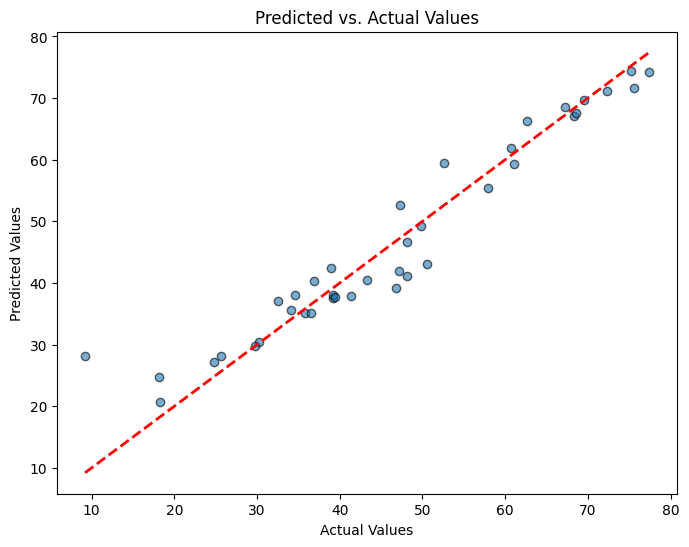

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)  # 45-degree line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values")
plt.show()

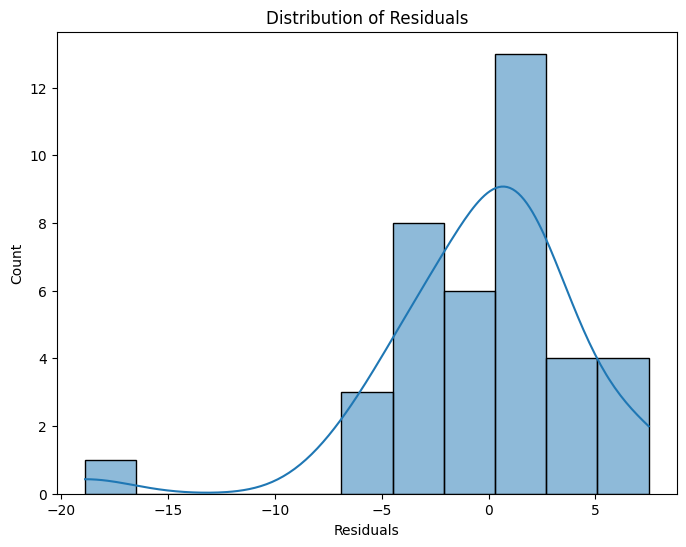

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

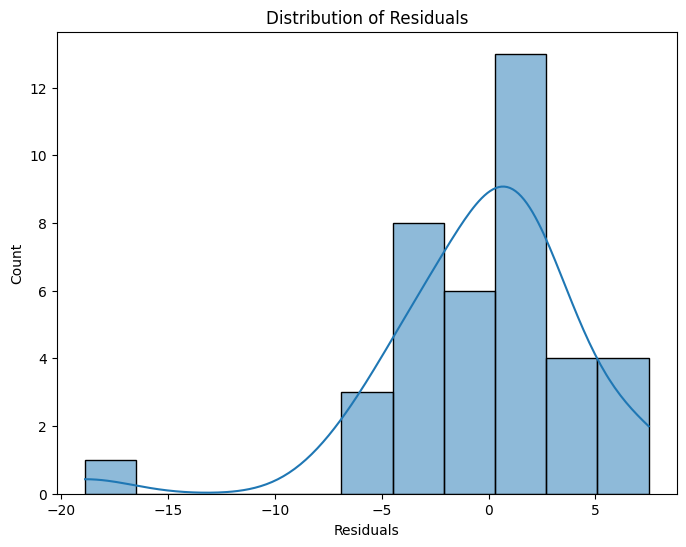

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred # This line calculates the residuals and assigns them to the variable 'residuals'

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

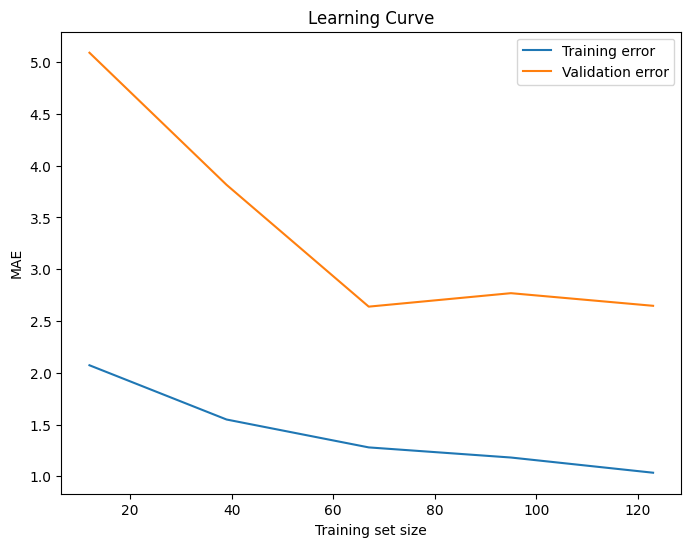

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, val_scores = learning_curve(rf_estimator, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

# Calculate average scores
train_scores_mean = -np.mean(train_scores, axis=1)
val_scores_mean = -np.mean(val_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label="Training error")
plt.plot(train_sizes, val_scores_mean, label="Validation error")
plt.xlabel("Training set size")
plt.ylabel("MAE")
plt.title("Learning Curve")
plt.legend()
plt.show()

In [ ]:
# Importing the SHAP library
import shap as sh
# Fitting the Explainer
explainer = sh.Explainer(rf_estimator.predict, X_test)

# Calculating the SHAP values. The below code might take some time to run.
shap_values = explainer(X_test)

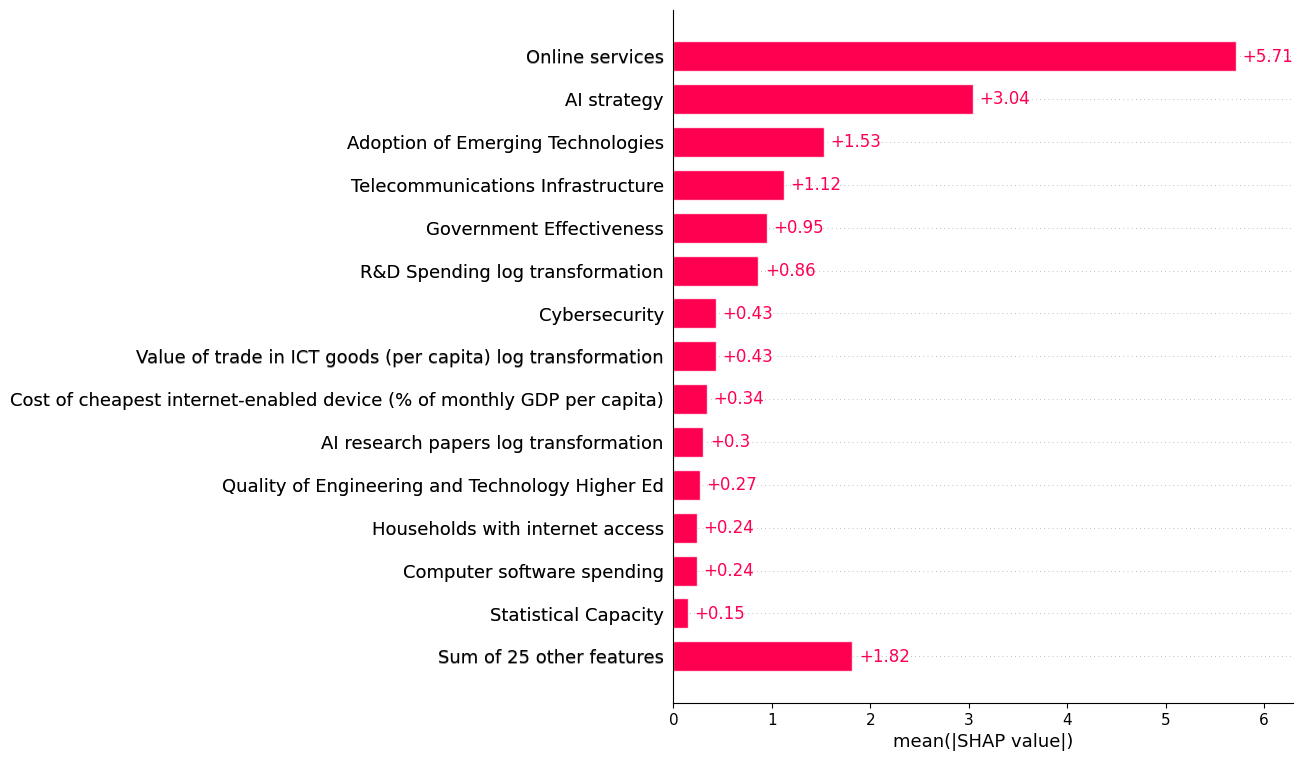

In [ ]:
sh.plots.bar(shap_values, max_display=15)

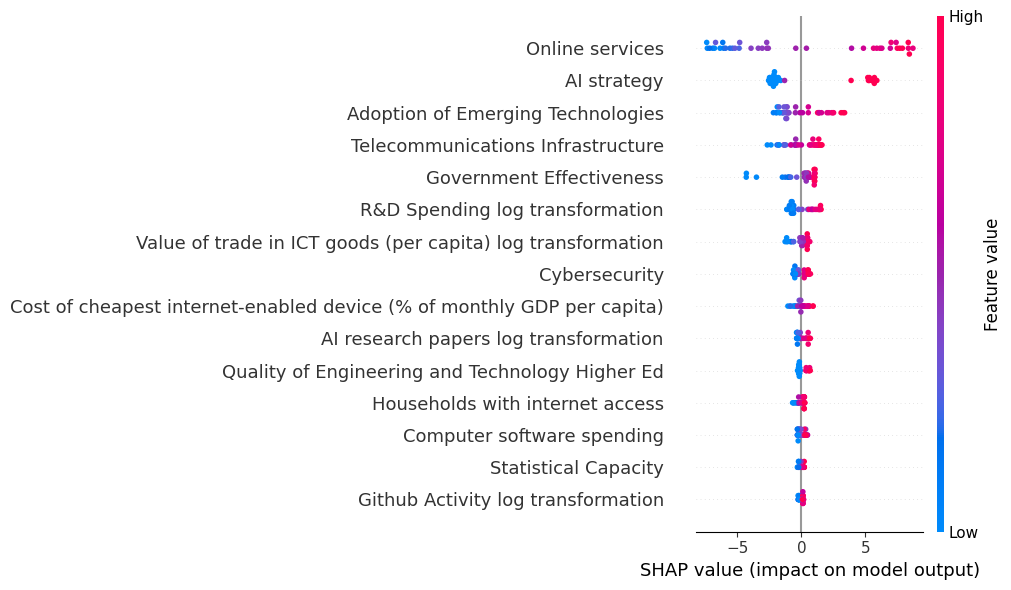

In [ ]:
sh.summary_plot(shap_values, max_display=15, plot_size=(10, 6))

##MODEL 2: RANDOM FORREST FOR CLASSIFICATON TASK

In [ ]:
# Separate the target variable and features, Target Variable CLUSTER shows level of AI adoption (high, medium, low, etc)
X1 = data_cl.drop(columns=['Country', 'IA Government Readiness', 'IA Adoption Level', 'Cluster'])
Y1 = data_cl['Cluster']

In [ ]:
# Splitting the dataset into train and test data
X1_train, X1_test, y1_train, y1_test =  train_test_split(X1, Y1, test_size=0.2, random_state=42)

In [ ]:
frequency_counts = Y1.value_counts().sort_index()
print("Frequency of each class in Y1:")
print(frequency_counts)

Frequency of each class in Y1:
Cluster
0    49
1    32
2    58
3    54
Name: count, dtype: int64


In [ ]:
Y1.info()

<class 'pandas.core.series.Series'>
RangeIndex: 193 entries, 0 to 192
Series name: Cluster
Non-Null Count  Dtype 
--------------  ----- 
193 non-null    object
dtypes: object(1)
memory usage: 1.6+ KB


In [ ]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(random_state = 1)

rf_estimator.fit(X1_train, y1_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        46
           3       1.00      1.00      1.00        41

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154



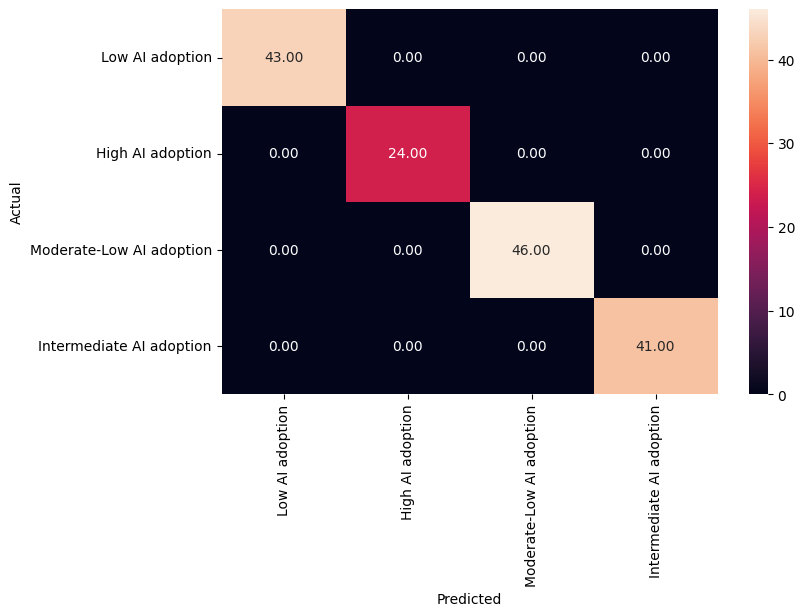

In [ ]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X1_train)

metrics_score(y1_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.88      0.93         8
           2       0.83      0.83      0.83        12
           3       0.85      0.85      0.85        13

    accuracy                           0.87        39
   macro avg       0.88      0.89      0.88        39
weighted avg       0.88      0.87      0.87        39



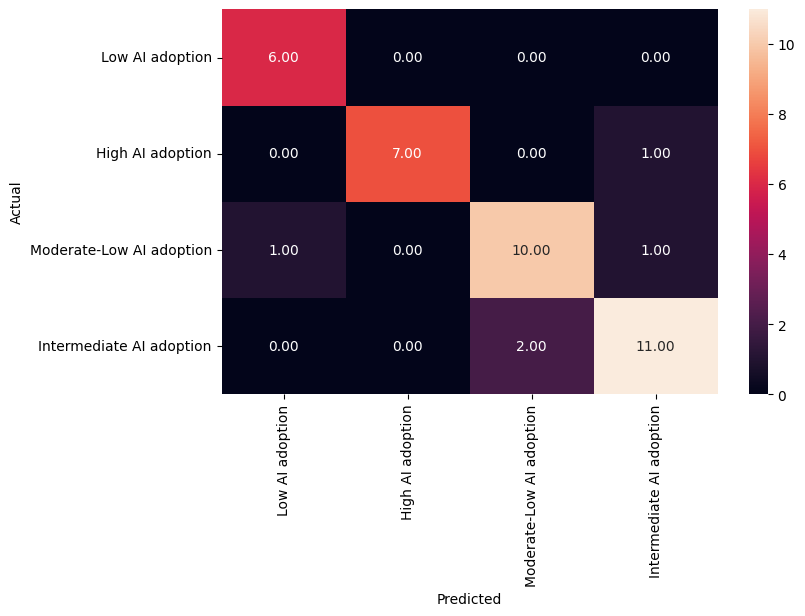

In [ ]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X1_test)

metrics_score(y1_test, y_pred_test_rf)

In [ ]:
rf_estimator_test = model_performance_classification(rf_estimator,X1_test,y1_test)
rf_estimator_test

Precision    Recall  Accuracy
0   0.884158  0.888622  0.871795

###**Tunning model**

In [ ]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(random_state = 1)

# Grid of parameters to choose from
params_rf = {
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X1_train, y1_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [ ]:
rf_estimator_tuned.fit(X1_train, y1_train)

RandomForestClassifier(max_features=0.7, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        46
           3       1.00      1.00      1.00        41

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154



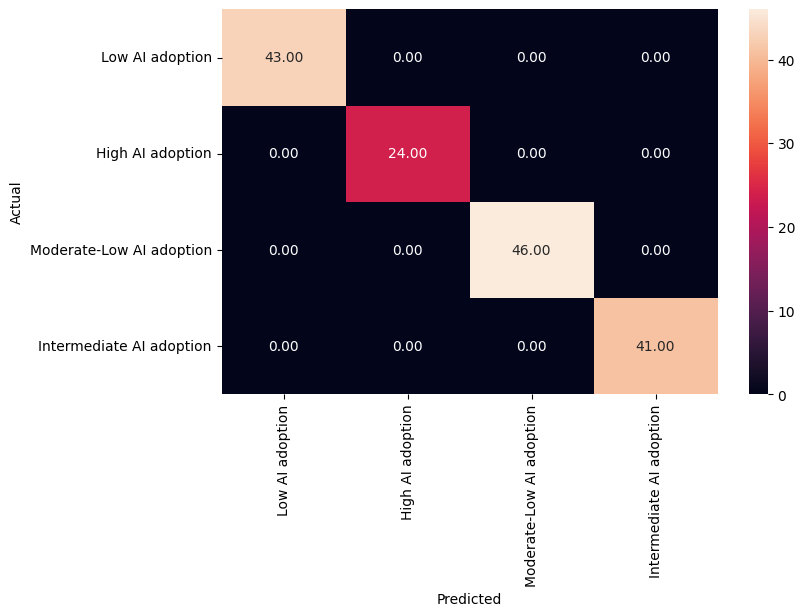

In [ ]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X1_train)

metrics_score(y1_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      1.00      1.00         8
           2       0.77      0.83      0.80        12
           3       0.91      0.77      0.83        13

    accuracy                           0.87        39
   macro avg       0.88      0.90      0.89        39
weighted avg       0.88      0.87      0.87        39



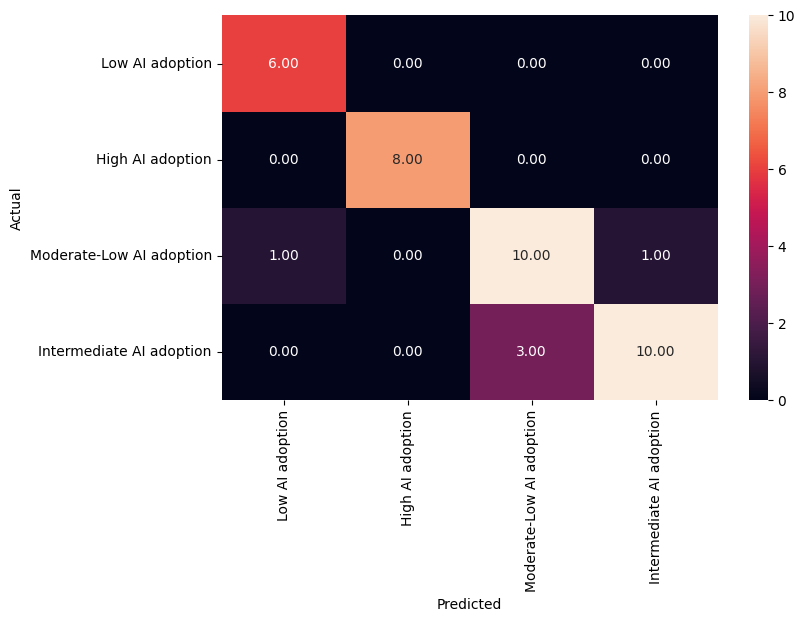

In [ ]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(X1_test)

metrics_score(y1_test, y_pred_test_rf_tuned)

In [ ]:
rf_estimator_tuned_test = model_performance_classification(rf_estimator_tuned, X1_test, y1_test)
rf_estimator_tuned_test

Precision    Recall  Accuracy
0   0.883866  0.900641  0.871795

<Axes: xlabel='Importance', ylabel='None'>

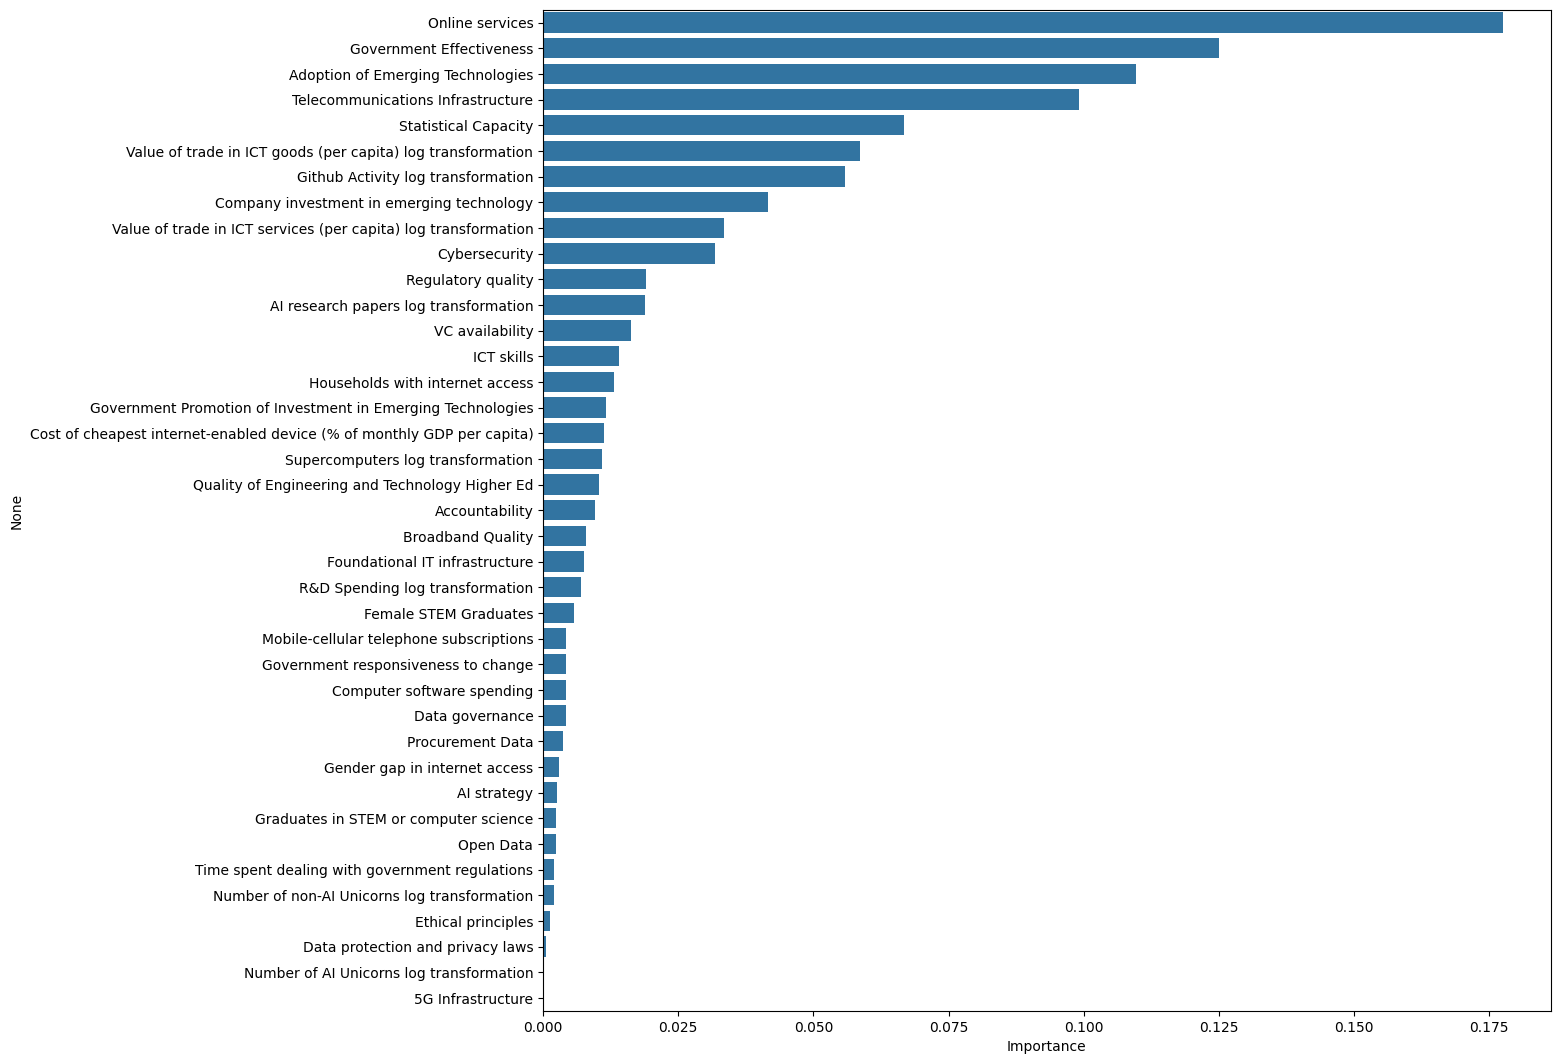

In [ ]:
# Plotting feature importance
importances = rf_estimator_tuned.feature_importances_

columns = X1.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x=importance_df.Importance, y=importance_df.index)

In [ ]:
# Get the number of classes
classes = rf_estimator_tuned.classes_
classes

array(['0', '1', '2', '3'], dtype=object)

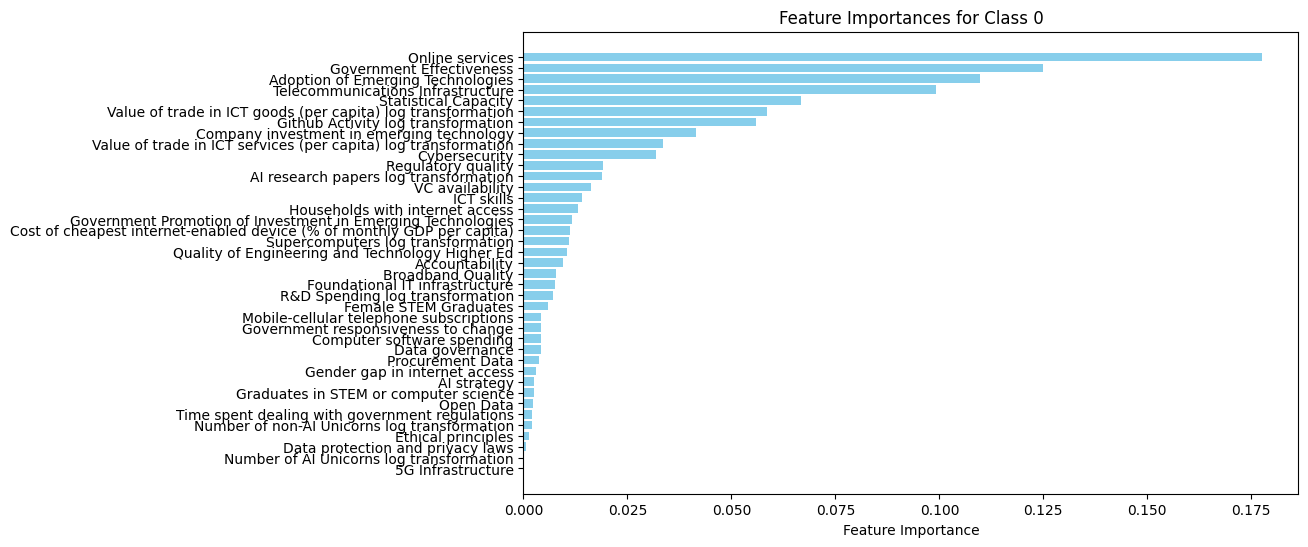

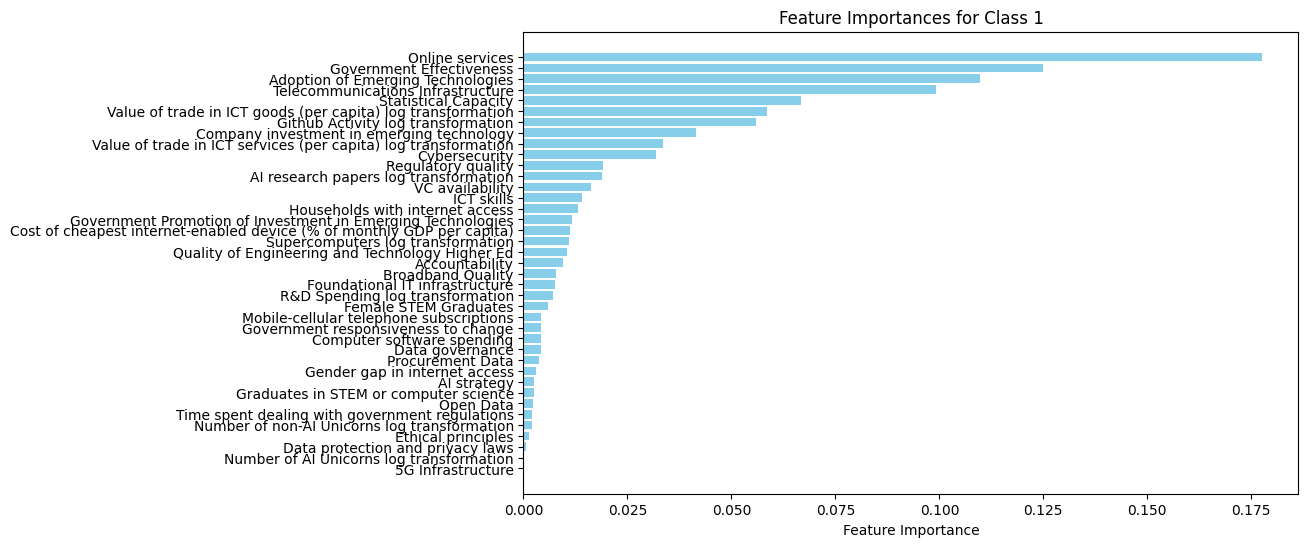

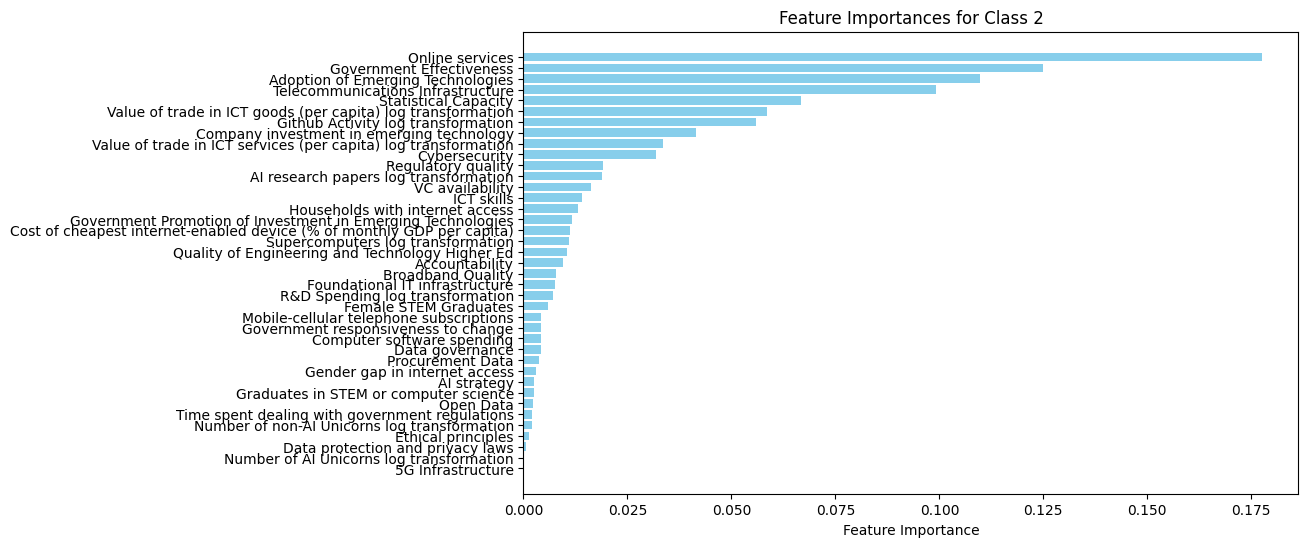

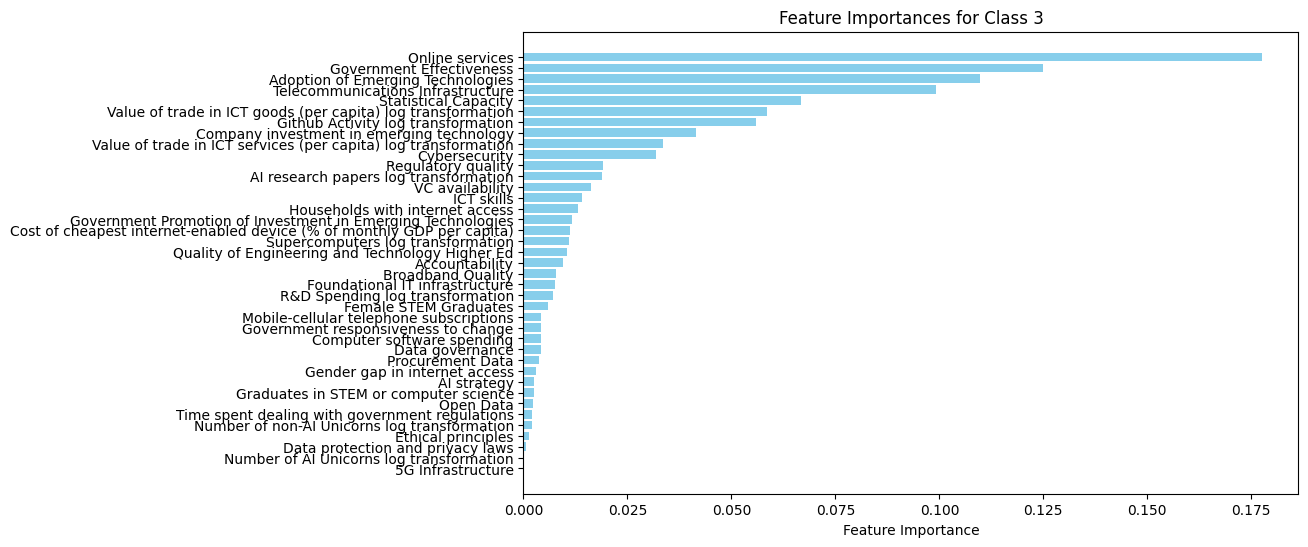

In [ ]:
# Get the number of classes
classes = rf_estimator_tuned.classes_

# Calculate feature importances per class by averaging feature importances across trees
n_classes = len(classes)
feature_importances_per_class = np.zeros((n_classes, X_train.shape[1]))

for tree in rf_estimator_tuned.estimators_:
    # Get tree-specific feature importances per class
    tree_feature_importances = tree.feature_importances_

    # Here we assume each class is represented in all trees equally
    for i in range(n_classes):
        feature_importances_per_class[i] += tree_feature_importances / rf_estimator_tuned.n_estimators

# Plotting feature importances for each class
feature_names = X_train.columns

for i, class_name in enumerate(classes):
    plt.figure(figsize=(10, 6))
    sorted_idx = np.argsort(feature_importances_per_class[i])[::-1]  # Sort features by importance
    plt.barh(feature_names[sorted_idx], feature_importances_per_class[i][sorted_idx], color='skyblue')
    plt.xlabel("Feature Importance")
    plt.title(f"Feature Importances for Class {class_name}")
    plt.gca().invert_yaxis()  # Most important feature on top
    plt.show()



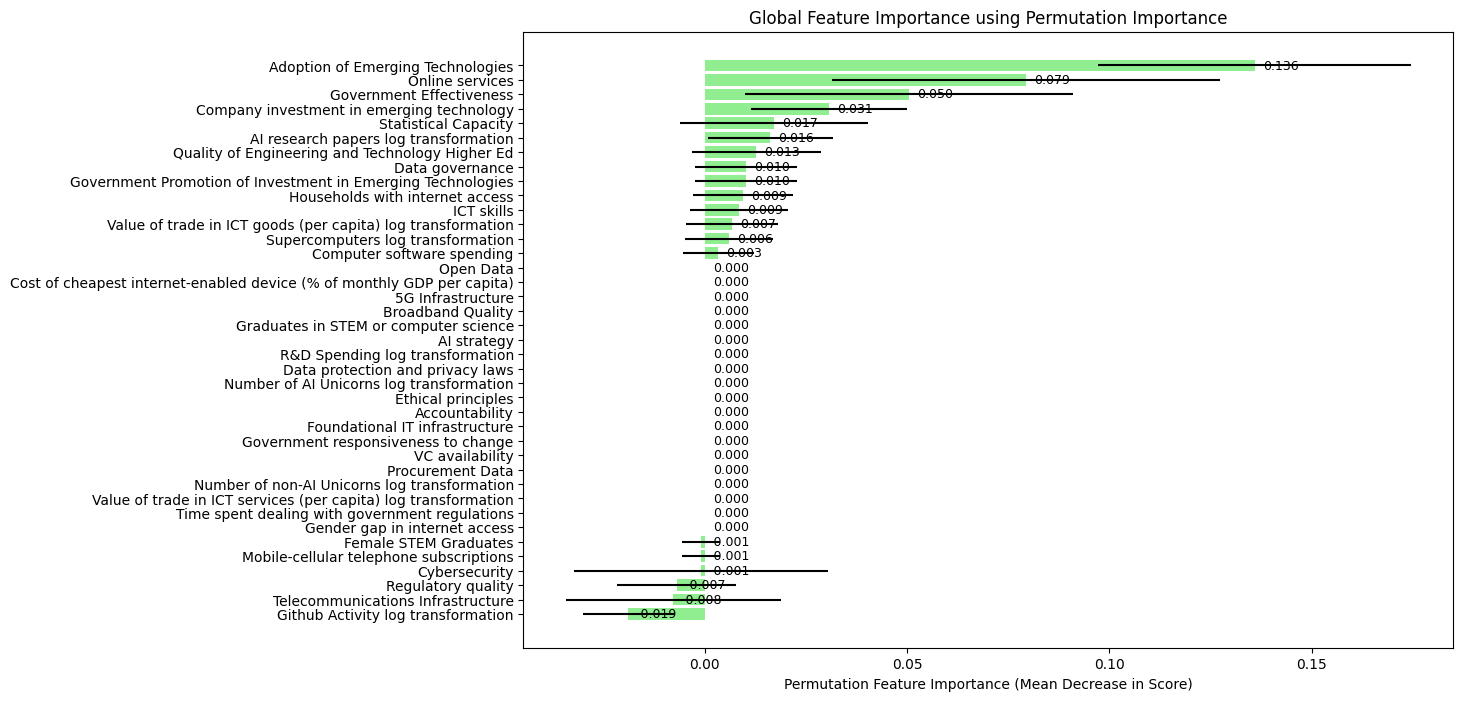

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd

# Calculate permutation feature importance
result = permutation_importance(rf_estimator_tuned, X1_test, y1_test, n_repeats=30, random_state=1)

# Convert to DataFrame for easier plotting
importance_df = pd.DataFrame({
    'feature': X1_test.columns,
    'importance_mean': result.importances_mean,
    'importance_std': result.importances_std
})

# Sort by importance
importance_df = importance_df.sort_values(by='importance_mean', ascending=False)

plt.figure(figsize=(12, 8))
bars = plt.barh(importance_df['feature'], importance_df['importance_mean'], xerr=importance_df['importance_std'], color='lightgreen')
plt.xlabel("Permutation Feature Importance (Mean Decrease in Score)")
plt.title("Global Feature Importance using Permutation Importance")
plt.gca().invert_yaxis()  # Keep the most important features at the top

# Adding text labels to each bar
for bar, value in zip(bars, importance_df['importance_mean']):
    plt.text(value + 0.002, bar.get_y() + bar.get_height() / 2, f'{value:.3f}', va='center', fontsize=9)

plt.show()


